# Computational Content Analysis on People's Personal Finance Concerns Based on Reddit Data




## Research Questions

What's the most frequent concern of personal finance? Is there a heterogeneity among different groups? Does the topics of these concerns change over time?

Corpora:

* Reddit Articles in subreddit [Personal Finance](https://www.reddit.com/r/personalfinance/)

* Investing subreddit: [Investing](https://www.reddit.com/r/investing/)

* Wall Street Bets subreddit: [Wall Street Bets](https://www.reddit.com/r/wallstreetbets/)


Social Game:

Consumption and investment are two import social indicators in economics. So, I would like to study people's consumption and behavior by their online postings.


Actors:

Most people who post articles on Reddit are young people, many of them are 20-30 (many of them reveal their age in posts) and it's interesting to learn the consumption and investment patterns of these young people.


World:

A large group of anxious young people--we can find students who just got their first job start to consider paying back student loan, buying houses/cars, taking care of aging parents, for the first time in their life. They ask advice from others on online platform to make finance-wise decisions.

What's people's biggest concerns in personal finance? Do they Change over time?

## Why my research important?

In the most widely used formula in Macroeconomics: Y = C + I + G + NX 
(Total economic output = Consumption + Investment + Government spending + Net Export), consumption and investment are individual activities that constitute of our society. 

A [Federal Reserve survey] (https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiB6O2fhs3uAhXQXc0KHbeLAXUQFjAAegQIARAC&url=https%3A%2F%2Fwww.federalreserve.gov%2Fpublications%2Ffiles%2F2017-report-economic-well-being-us-households-201805.pdf&usg=AOvVaw33ULJILWvmE0JU8Dweye4R)  finds almost 40% of American adults wouldn't be able to cover a $400 emergency with cash, savings or a credit-card charge that they could quickly pay off. Why do people in the United States, the most powerful country in the world, face this problem? What's the heaviest financial burden on people? Where is the money going? What are the topics that people who seek financial security talks every day? To answer these questions, we can analyze people's posting online.

**The benefits people can get after they learn the results of my study**

My study will report the most common financial burden on people, and the time trend of the changes most-discussed topics. So people can know what bothers us and if the things that bother us change over time.

## How

1. Collecting data and basic cleaning: Use Reddit API to get data from [Personal Finance](https://www.reddit.com/r/personalfinance/) subreddit; tokenize, normalize and vectorlize the data.

2. Counting the words and phrases: count the frequency of key words and n-grams in reddit post, do part-of-speech tagging and find the difference from personal finance reddit and other finance-related subreddit.


3. Topic Modelling: Do Latent Dirichlet Allocation topic modelling for texts of subreddits.

4. Word Embedding



## My sample

**The rationale behind my proposed sample design**
Collect data from online [financial discussion forums](https://www.doughroller.net/personal-finance/8-awesome-online-forums-personal-finance-investing/): Reddit-Personal Finance, myFICO Forums, YNAB Forums, Morningstar Forums, Reddit–Investing, and Bogleheads Forum. My sample will include the first four datasets.

**Social Game:**
People's income and financial concern.

**Social Actors:**
Online financial websites users: people who post their concern, seek for advice, or share personal experience.

**Its virtues with respect to my research questions:**
People's online discussion is a reflect of their real-life concern

**Limitations:**
Generalization Bias--most users of online platforms are young people who are used to the internet. Middle-age people may not be willing to disclose their financial concerns online.

**Alternatives:**
Other discussion websites.

**Methods to scale up my sample:**
I can boarden my dataset by scale up the time peorid to include more aticles from myFICO Forums, YNAB Forums, Morningstar Forums, Reddit–Investing, Bogleheads Forum, Fat Wallet Forums, and Bigger Pockets Forum.


# Scrape Corpora from Reddit with PRAW

In [146]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud #pip install git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git
import praw

#All these packages need to be installed from pip
import requests #for http requests
import bs4 #called `beautifulsoup4`, an html parser
import pandas as pd#gives us DataFrames
import pandas
import docx #reading MS doc files, install as `python-docx`

import re #for regexs
import urllib.parse #For joining urls
import io #for making http requests look like files
import json #For Tumblr API responses
import os.path #For checking if files exist
import os #For making directories

For privacy issue, API key is in json file (which is in .gitignore) because it contains my password and personal tokens and my GitHub repository is public.
I will save the data for later use, so you don't need to scrape the data by yourself. However, if you want to replicate this process, you can create your own Reddit API conveniently by following [this guidance](https://praw.readthedocs.io/en/latest/getting_started/authentication.html).

In [4]:
with open('Reddit_API_info.json') as f:
    api_info = json.load(f)
    f.close()

In [9]:
reddit = praw.Reddit(client_id = api_info['client_id'],
                     client_secret = api_info['client_secret'],
                    user_agent = api_info['user_agent'],
                    username = api_info['username'],
                    password= api_info['password'])

## Scrape from Subreddit 

In [120]:
subred = reddit.subreddit("personalfinance")

# several attribute helps us to sort articles in subreddit
hot = subred.hot(limit = 10000) # sort all the subreddit articles by hot
new = subred.new(limit =10000)
controv = subred.controversial(limit = 10000)
top = subred.top(limit=10000)
gilded = subred.gilded(limit=10000)

In [22]:
type(hot)

praw.models.listing.generator.ListingGenerator

As shown above, this can help us get a generator object, then we can use a loop to retrieve the data. However, Reddit has a limitation that it will only have at most ~1000 posts in each category (which is far more than a real person's reading ability) But it's not enough for computational analysis, especially for dynamic topic analysis in the later part. There are archived Reddit data on Google's Big Query platform, but it has stopped updated since 2019. So I decide to study the latest reddit post for the most part of this project, and use the archived historical reddit data in the dynamic topic modeling analysis.

In [121]:
pf_top = []
for i in top:
    pf_top.append({'title': i.title,
                        'text': i.selftext,
                        'url':i.url,
                        'created_utc':i.created_utc
                       })
    print(i.title)
pf_top = pd.DataFrame(pf_top)

You are not "family" to your company. If you have an opportunity to better yourself, take it. They will do the same when it comes to cutting ties with you.
If you’re ripped off by Comcast (or any internet company), Wells Fargo (or any bank/student lender), or Aetna (or any health insurance company), here’s how to get your money back.
U.S. Breaks Up Fake I.R.S. Phone Scam Operation -- 21 people sentenced for up to 20 yrs, 32 in India indicted
I made a spreadsheet for people who don't know how to budget!
Stop Spending Money on Food! -- BUY A CROCKPOT
Quick Reminder to Not Give Away Your Salary Requirement in a Job Interview
Bank of America just imposed a new $60 annual fee on their previously free personal savings account.
For everyone shopping on Amazon's Prime Day: "savings" from sales aren't savings if you weren't already planning on buying the item.
In most cases, it will cost your employer far more to replace you than it would to give you a raise. So ask firmly.
IRS will allow emplo

Successfully negotiated a 45% raise in salary, thanks pf!
Bank of America is refusing to give back $9,800 to my dad's account after someone fraudulently stole his funds.
GE freezes pensions for 20,000 employees - aka why I always urge people to invest in their own retirement funds
Saying: "I don't want to save, I want to live life and have fun while I'm young" is just an excuse that makes you feel better about your bad spending habits.
Almost 70% of millennials regret buying their homes.
Things I wish I'd done in my 20's
Gave a two month notice I was leaving my company, was told it was unprofessional. Advice?
Negotiated a 17k raise after ~ 2 1/2 years of stagnation. Feels great!
Surprise $2,700 medical bill from a "Surgical Assistant" I didn't even know was at my surgery.
U.S. Tax Filers making less than $65,000 per year: The IRS has a 100% Free-File option that is rarely if ever publicized
This was my first year filing my own taxes. So, I tried 3 different “free” tax softwares to see 

If you can afford it, pay a little bit extra to get a lot of extra protection regarding car insurance.
I called the hospital to work out a payment plan, got a big discount with no effort.
For all the 2020 graduates and those who are now turning 18, plan ahead to open a new bank account that is solely in your name.
Alert for people with Capital One savings accounts...
I'm a 27 year old single male looking to get out of manual labor and start from the bottom somewhere with the highest potential for a successful future.
I've been offered a promotion, was forceful on salary and my boss freaked out, is avoiding me
Wife got a job offer that feels like a scam
Amazon seller fraudulently used my husband's SSN and now the IRS wants us to pay taxes on income they generated selling.
$65k+, hate my life vs. $45k, happier
Some helpful information regarding medical insurance - based on 25 years experience
My husband and I are idiots. We've been bamboozled by a financial advisor.
Over a year after it 

What is the point of an "annual review" if no raises are ever given?
I made a Google Sheet to replace Quicken
Treat paying off debt like earning a raise.
My boss offered me my first salary position and expects me to counter his offer. What do I counter with if I’m already satisfied with his offer?
Check for $1900 that isn’t mine was deposited into my account.
What am I supposed to do when my boss tells me I should "think about whether or not I want to be here" at my job?
Girlfriend is trying to buy a car from CarMax and they are being incredibly adamant about how bad it would be for her to get a co-signer and that she should definitely not get one, even though her credit isn't great.
[Update] Just got out of prison and owe SO much money...
It's happened again: My HR rep fell victim to a phishing scam and sent all 50 employees' tax info to some fraudster yesterday. Company has yet to notify everyone officially. What should I do?
$5 dollars for 5 years: a savings experiment.
My girlfrien

I believe that to truly get your financial life in order, you need to know exactly where your money comes from and where your money goes. In 2017 i tracked every penny in and every penny out while strictly categorizing it
Teachers and students can download Microsoft Education 365 and get all Microsoft Office programs for free, as opposed to the typical $99.99/year subscription price!
"The best time to look for a job is when you don't need one."
So payday loans are getting ridiculous
Stop thinking of your debt in terms of your yearly salary, think of it in terms of your salary after taxes and living expenses.
I accepted a counter offer from my employer, and they back tracked..
I'm glad I didn't think, "It's too late to start a Roth IRA"
In case you haven’t, you can call your auto insurance provider and lower your monthly payment if you’re no longer commuting to work due to social distancing!
The best time to look for a job is when you have a job - solid evidence from the Federal Reserve

BEWARE: scammers are making unsolicited calls claiming to be IRS officials attempting to steal your identity. They may also leave “urgent” callback requests through phone “robo-calls,” or via a phishing email as tax deadline nears! Do not give any information. Hang up immediately.
My credit card bank has forgiven 1300 dollars on my card without even asking
Ex-Boss asks me to drop an unemployment claim
Rent increase continues to outgrow wage increase.
I [34M] was told last month I was getting a 15% raise on my salary [47.5k]; got my first paycheck today and my net pay only increased by $150. Where’d my raise go?
Bill from AT&T wireless came to my house for $730. I don't have AT&T wireless....
You can cancel your 24 hour fitness membership online now
Very Productive Year, Disappointing Raise, Boss Said He Had Too Many "Good" Employees
In case your identity is ever compromised, I quickly just want to let you all know that identitytheft.gov is a fantastic resource.
Update RE: I might be ki

My [parent/sibling/significant other/friend] wants me to cosign on a [auto loan/mortgage/student loan] with them. Should I do it?
Always check your paystubs
Consider working at a University if you want another degree but can't afford it
Wife was overpaid. Employer demanding gross repayment.
My family is forcing me to co-sign a mortgage loan
PLEASE take some time to understand your benefits at work
Lifestyle inflation is a bitch
Do not use TrueCar
Successfully lowered a medical bill by 81%
I went from being jobless and 43k in debt to a job, wife, house, child, and debt free in 2.5 years - all under 60k in salary.
Many will see their 401k statements and think
Denied for credit card because "You have had 84 hits on your credit in the last 30 days"
Is my landlord responsible for paying my exorbitantly high electricity bill?
UPDATE: Sprint is holding my credit hostage over their error and sending me to collections
Charge-backed 24 Hr Fitness through my bank, they are contacting me trying to

Call Discover unless you're comfortable with them selling your data
Always ask for proof of debt!
Do I have enough saved to adopt a cat?
Engineer about to be fired but given option to resign, should I take it?
I’m an intern that makes $15/h and my job never takes taxes out of my paychecks because they classify me as a contractor. I read that I don’t have to pay taxes if I make under $12,000/year but that doesn’t sound true. How do I pay my taxes? Am I exempt from certain taxes?
Parents want me to take out a loan/mortgage in my name towards new house. Please advise.
New mortgage servicer is charging 15$ per payment to pay mortgage online. Is that normal? Seems insane.
450 Reasons to Check Local Classifies Before Buying New
I laid off from my 99k job, my 8-month pregnant wife is still working making 90k (get 16wks paid leave), our emergency fund mostly drained from a prior emergency, and the day before I was laid off I signed up for a PMP course that will only give me a 75% refund; what 

I just got a 50% raise. [$60k to $90k]
Firefighter (47M), I got injured on the job and now I have to retire. I wasn't planning on this, so I have several questions and need lots of advice.
I have a meeting in two hours at which I expect to be let go.
MIT's living wage calculator is actually pretty accurate
Oh...so that’s how interest works
USPS lost our money order, landlord tells us we have to write a new check by Monday. Really need advice .
20 years old, $0 expenses per month making $14/hour 30-40 hours per week. What do I do with my money?
So, I'll be going to prison soon. How will my financial situation be when I get out?
A cautionary tale for young students and letting your parents handle your student loans
We have a total wedding cost of about $8000 (which we have). Is it worth getting a credit card to put it all on for the rewards? If so which one? (Credit score is just under 800)
UPDATE: Accepted a job offer, less than 24 hours later another company offered 15K more. What's th

Employer adjusts 80 hours down to 78.667 hours every paycheck. Salaried and the amount I'm paid is right. Curious if this is some kind of loophole.
Breaking the habit of going out to eat
Just opened some mail to find that have had an outstanding balance from an ER visit last November where they didnt have my insurance on file even though it's the ER in the hospital I work at and have insurance through. Now it's been sent to a collection agency and im freaking out.
My retired father has a considerable income but is having trouble paying bills/taxes. I'm worried about his spending habits. What course of action, if any, can I take?
I was so obsessed with saving money and frugal living and it made me depressed.
Wife broke her back in the Dominican and we're at a loss for what to do
My father has about $400k just sitting in his savings account. What are his best options for long term (10-15 year) returns?
My Grandma left me a fund in NY(USA) but, she has parkisons, she cant remember where o

In [124]:
len(pf_top)

991

We only want got 894 posts here, since Reddit restricts it to less than 1000. But we can still analysze it! We can accquire posts in this subreddit via archive later.

In [122]:
subred = reddit.subreddit("wallstreetbets")

# several attribute helps us to sort articles in subreddit
hot = subred.hot(limit = 10000) # sort all the subreddit articles by hot
new = subred.new(limit =10000)
controv = subred.controversial(limit = 10000)
top = subred.top(limit=10000)
gilded = subred.gilded(limit=10000)

wsb_top = []

for i in top:
    wsb_top.append({'title': i.title,
                        'text': i.selftext,
                        'url':i.url,
                        'created_utc':i.created_utc
                       })
    print(i.title)
wsb_top = pd.DataFrame(wsb_top)

Times Square right now
UPVOTE so everyone sees we got SUPPORT
GME YOLO update — Jan 28 2021
GME YOLO month-end update — Jan 2021
It’s treason then
CLASS ACTION AGAINST ROBINHOOD. Allowing people to only sell is the definition of market manipulation. A class action must be started, Robinhood has made plenty of money off selling info about our trades to the hedge funds to be able to pay out a little for causing people to loose money now
GME YOLO update — Feb 19 2021
Used some of my GME tendies to buy Nintendo Switches from Gamestop, then donated them to a Children's Hospital. Got featured on the local news and brought glory to WSB.
GME YOLO update — Jan 27 2021 --------------------------------------- guess i need 102 characters in title now
IT'S POWER TO THE TRADERS NOW
GME YOLO update — Feb 1 2021
Can we all take a moment and appreciate the Mods who have grinded through this and held our community together. Thank you.
Wow super bowl commercial for us
That’s what I thought
I am proud to 

It’s a sign
💎🙌🏻 You heard the Wolf!
ONE OF US - ONE OF US
America, Meet GameStop: WE'RE NOT FUCKING LEAVING 💎🙌💎 FOR LIFE
The Legend of $GME
Which one of you glorious bastards did this?
Who stopped the losses for the millions who lost their jobs and homes during the 2007 GFC or 2020 Covid-19 pandemic? You don't get to just shut off the market just because you are on the wrong side of a trade.
Don’t stop holding, men! 🎮🛑🚀🌑
$GME & $AMC Line comparation, from the last 5 Days...
Hey, Bloomberg, how about you go fuck yourselves.
$GME Gang Awarding Their Own Posts
#LONG LIVE THE MEME 🚀🚀🚀
BREAKING: CNBC Officially Gives Up, Stocks Enter Kangaroo Market
How the SEC treats Hedge Funds vs Retail investors
Just liquidated $188K worth of stonks AKA FRESH POWDER for the battle tomorrow 🚀🚀🚀🚀
Power to the players
I recruited an astronaut to help get us to the moon. He’s also an actor, scientist, doctor, and lawyer, and seriously knows his stuff! He loves the movies and we love the stock! Long live AMC

If PAPA MUSK IS FOR US WHO CAN BE AGAINST US !!! IM STILL HOLDING!!!
Well, Fuck
It needs to be said louder and more often. WE ARE KILLING IT.
We made it to the bull. Taking over boys!💎💎
🚀🚀 $GME Premarket be like 🚀🚀
Great Scott...$AMC
To the moon we go! 🚀🚀🚀🌙
$GME after the hedgies dropped it to 198
This is so satisfying to look at
"We Can Stay Retarded Longer Than You Can Stay Solvent" - Someone
My best GME gain porn. $1,295 --> $959,663 in just over 3 weeks. Sold because of brokers blocking buy orders. Sorry
On. Serious note: respect the decisions of deepfuckingvalue from here on out
It really do be like that doe
GME Megathread Part 2 for March 10, 2021
Economic Scarcity 🤔💰
My gf and I are holding GME from South Korea. Hold the line!!
Please stop promoting Belfort
I’m so fucking proud of every single person in or connected to this sub.
Stonks
What 3,280,000 jobless claims looks like versus the past 50 years of reports
u/SquishedPeter's Cat Megathread for March 2nd, 2021
Why This Weeken

Robinhood Is Lying - You Are Blocked Acquiring More Than 5 Total Shares
$6k ➡️ $192k. Made $170k in day and then stomached yesterday’s dip. 19 years old and not selling til we’re at a few mil. WE DECIDE GME’S PRICE — HOLD STRONG
Don't relent now boys. I just bought 1000 on margin. 🚀
This sub in nutshell
I was there the day the strength of men endured...
20,000% gain..... on one .59 cent option lol 65$ into 12k
After doing my DD on researching Chinese companies everything starts to become clear....
If you’re wondering why Robinhood wasn’t working...
Me getting ready to fight the Hedgies on Monday market open by buying more GME
Take it from MARK FUCKING CUBAN. Don’t panic sell and hold that shittt. 💎 🙌🏻 > 📄 🙌🏻
Someone is actively driving attention to non-GME posts on reddit. Don't be fooled comrades. 💎🙌🚀🚀🚀
“We live in a fraudulent system” - someone from the Big Short
WE'RE THE GUARDIANS OF GAMESTOP
Bought at 300$ at the top but I know my chimps coming to get me soon. Ape never leave ape 

GME with AMC and BB overlay - Virtually Identical.
WALLSTREETBETS VS WALLSTREET: SHORT SQUEEZE ROUND 2
My SURGEON Is On WSB, And Basically Just Called Me A Retard
Jokes on them. Red is my favorite color
Me, a long time lurker who suddenly YOLO’d on $GME trying to understand how I got myself into this mess.
All of Reddit is holding with us! Thank you to the other communities holding the line! DIAMOND HANDS!!
There's a difference between joining wsb and becoming a member. Today, many of you became members
Man stole $122m from Facebook and Google by sending them random bills, which the companies dutifully paid
Not to brag, but looks like I’m so autistic that people are writing articles about my exploits
Hey if it's fucking yellow outside does that mean stocks are gonna go up or down?
Using literal chicken shit to predict next week ft. babey chickies
Why we're still winning, and why we're still going to the moon. [REASSURANCE DD]
Not. Fucking. Selling! GME AMC💎🙌🏻 Who's with me?
This is why

In [125]:
len(wsb_top)

953

In [123]:
subred = reddit.subreddit("investing")

# several attribute helps us to sort articles in subreddit
hot = subred.hot(limit = 10000) # sort all the subreddit articles by hot
new = subred.new(limit =10000)
controv = subred.controversial(limit = 10000)
top = subred.top(limit=10000)
gilded = subred.gilded(limit=10000)

invt_top = []

for i in top:
    invt_top.append({'title': i.title,
                        'text': i.selftext,
                        'url':i.url,
                        'created_utc':i.created_utc
                       })
    print(i.title)
invt_top = pd.DataFrame(invt_top)

Robinhood and other brokers literally blocking purchase of $GME, $NOK, $BB, $AMC; allow sells
United Airlines stock down over 5% premarket trading
Bitcoin was nearly $20,000 a year ago today
If in 2001, you bought $399 of Apple stock instead of buying the original iPod, today that stock would be worth ~$62,000.
Jim Cramer Gave an Interview in 2006 on how the Hedge Funds Manipulate the Markets
Historically it's way better to invest at market close than at market open, most gains occur overnight
Uber Fined $649 Million for Saying Drivers Aren’t Employees
Long Island Ice Tea Corp, a beverage company, was up 500% premarket today after changing its name to Long Blockchain Corp, despite having no relation to blockchain in its business
Emotional involvement has never been this high, please understand the risk involved.
TIL if you had bought EA stock after they were voted "The Worst Company in America" your investment would be up by more than 378% today
Tesla posts profit of $2.92, stock jumps

US now pumping more oil than Russia and Saudi Arabia
Apple is no longer the most valuable brand in the world as Google takes top spot
Musk tweet knocks $14bn off Tesla market value
I want to verbally vomit a few chunks about how vile this sub is.
Reasons We May Not Be in a Bubble
Cramer thinks Wall Street pros may be playing a game with Robinhood traders
Johnson & Johnson has been ordered to pay nearly $4.7bn in damages to 22 women who claim the company’s talcum powder contributed to them developing ovarian cancer (six of whom have died from ovarian cancer).
Buffett wins $1M bet that the S&P 500 would outperform hedge funds
'Johnson & Johnson knew for decades that asbestos lurked in its Baby Powder' - Down 8% and falling.
Disney and other companies reportedly suspend YouTube ads over news of pedophile network on the site
Goldman Sachs warns data point to a historic and frankly apocalyptic surge in unemployment insurance claims, from current 281,000 to 2,250,000 in next week’s report. Y

U.S. labor jobless claims increase to 870,000. Total unemployment 26 million.
Rihanna wipes $1bn off Snapchat after criticising app for making a 'joke' of domestic violence
FT: Nikola founder bought truck designs from third party
Buffett buys back record $5.1 billion in Berkshire stock as coronavirus hits operating earnings
Opinion: The market is rising not because people ignore the severity of the crisis but because financial statements of Q1 hasn't been released yet
Krugman: "Investors are buying stocks in part because they have nowhere else to go. In fact, there’s a sense in which stocks are strong precisely because the economy as a whole is so weak."
Netflix To Sell $1 Billion In Bonds After Adding 16 Million New Subscribers.
What if jobs don't come back? Stanford study says 42% of job losses will result in permanent job loss.
"American Rescue Plan" - Biden proposes $1.9T stimulus
China stocks plunge amid heavy selling in the energy sector and growing worries about the economy
Appl

AMC theaters in talks to hire bankruptcy law firm Weil Gotshal amid coronavirus shutdown
Jeff Bezos is the world’s richest man
CRSP announces their gene editing treatment in a remarkable study ostensibly cures patient of sickle cell anemia
Where is Jim Cramer?
Pfizer vaccine candidate must be kept at around -100 degrees Fahrenheit, who will supply the refrigerators?
Tesla just announced a 5-for-1 split
Trump says tariffs on $200 billion of Chinese goods will increase to 25% on Friday
Boris Johnson moves to ban Huawei in the UK by 2027
Buffett's Berkshire doubles profit, repurchases $900 million stock in third quarter
The end of GameStop
Coca-Cola in talks with Aurora to develop cannabis drinks
US 1 Month treasury just went negative
Oil $11.66 could go below $10.00
In A Bold Asset Grab, Robinhood Offers 3% Interest On Checking And Savings Accounts
Cathy Wood predicted Bitcoin, Tesla, Square, Invitae and now Crispr
[CNBC] Robinhood traders cash in on the market comeback that billionaire 

For those of you who do extensive research prior to buying a stock, what do you look for in a companies financial statement or financial analysis when deciding to buy or sell? (I.e. profit margin, operating costs, short % of float, p/e, etc.). What do you place you the most weight on?
Netflix market cap hits $100 billion for first time after adding more subscribers than expected
Robinhood brought in more than 40 percent of its revenue in early 2018 from selling its customers’ orders to high-frequency trading firms
Let me get this right, Soft Bank buys billions of dollars worth on NIVDIA Option Calls. Then Soft Bank announces its completion sell of ARM to NVIDIA. Which causes an additional 10% gain on the NVDA stock price.
Carl Icahn Scores $1.3 Billion on Bet Against Shopping Malls
650,000 Tesla Cybertruck preorders apparently
Bloomberg: Boeing’s 737 Max Software Outsourced to $9-an-Hour Engineers
Berkshire Hathaway snapped up approximately 20.9 million shares of Barrick Gold in Q2, a 

PLTR jumps 12% even though US market's closed
MSFT to acquire Bethesda
My portfolio hit 500k!
Lawmakers agree to $2 trillion stimulus early morning
Lost more money actively trading than holding index funds
SEC charges Robinhood $65m
Beyond Meat is expected to report its first profit as a public company after the close today but there will probably still be a big sell off tomorrow as the lockup period ends and insiders (who account for 80% of outstanding stock) are finally allowed to sell their stock and realize large profits
-140,000:Payrolls drop for the first time since April, unemployment rate steadies at 6.7%
Oxford University’s coronavirus vaccine with AstraZeneca shows positive immune response in early trial
Gilead Sciences' Antiviral Drug Remdesivir Flops in First trial - FT
NVIDIA Shares Reach All-Time High as Notebooks Account For 30% Revenue
Herbalife to pay 123MM in Chinese bribery case
Comcast is in talks to sell its 30% stake in Hulu to Disney
Elon Musk taunts short seller

For those who are buying company stocks to avoid ETF fees in ARK
US crude plunges 4.2%, settling at $66.43, in biggest daily loss in three months
Beyond Meat IPO Raises $241 Million as Veggie Appetite Grows
Bloomberg: Nikola’s History of Discrepancies Has Been Hiding in Plain Sight
Goodbye until this is all over.
Amazon Founder, Jeff Bezos Net Worth Just Broke $100 Billion!
Fitch warns of possible downgrade to U.S. AAA credit rating if shutdown persists
Amazon Is Testing Its Own Delivery Service to Rival FedEx and UPS
JPMorgan lost $273 million on a single client in the fourth quarter
U.S. weekly jobless claims unexpectedly increase
Nikola targets critical YouTube accounts in copyright crackdown
BBC: Bitcoin Cash deals frozen as insider trading is probed
Delta revenue down 88% YoY Q2, for $5.7 billion loss. Estimates 2 years before sustainable recovery
US jobs report: unemployment rose to 4.4% in March after February's 50-year low
EBay, Stripe and Mastercard abandon Facebook’s libra cr

Amazon plans to launch a new Middle East marketplace, two years after buying Souq for $580 million
Disney suspends dividend
Lyft is threatening litigation against Morgan Stanley, accusing the firm of supporting short-selling
Stocks Jump 3.2% the Most in Almost 6 Weeks After Moderna Vaccine Announcement
CNBC’s Jim Cramer: ‘We are in a bear market’ - February 2016
Warren Buffett has long praised the virtues of putting money in low-fee index funds, but many of his companies don’t offer such funds in workers’ retirement accounts. It’s a problem shared by millions of Americans.
The recent TSLA price spike was timed too perfectly
TSLA up another 9% pre-market...
Target shares surge 13% as second-quarter profit jumps, retailer hikes earnings outlook
Bloomberg: Resist Your Inner Buffett. It's Time to Do Nothing
Amazon, Berkshire Hathaway, JPMorgan Chase appoint Dr. Atul Gawande as CEO of their newly formed health care company
Apple is spending $6 billion on original shows and trying to beat Di

Monsanto ordered to pay $289m damages in Roundup cancer trial
Some tips on buying when the market falls
Insider Trading has been rife on Wall Street, academics say
Trump announces plans to impose additional tariffs on $200bn worth of Chinese goods at 10%
Bank of America's Merrill Lynch routinely misled customers telling them stock trades were managed in-house, while turned over to outside firms
Intel in talks to buy Israel's Moovit public transit app for $1 billion
GE shares drop after Madoff whistleblower Harry Markopolos raises red flags on its accounting
Facebook market cap just hit $300 billion: It's now a bigger company than Disney, Fox, Viacom, Time Warner & CBS combined.
Warren Buffett: Banks will be worth more money 10 years from now
This high market values situation isn't going to change until & unless the US gov stimulus stops and it begins to unwind/extricate itself from the financial markets. So, my question is, how will it happen and what will it look like when The Great U

In [126]:
len(invt_top)

987

In [127]:
pf_top.to_csv('data\pf_top.csv')
wsb_top.to_csv('data\wsb_top.csv')
invt_top.to_csv('data\invt_top.csv')

# Counting Words & Phrases

In [140]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud #just in case, regularly update your lucem_illud with the following code: pip install git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas as pd
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls
import nltk

# comp-linguistics
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

#Displays the graphs
import graphviz 

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile



#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook

%matplotlib inline

nlp = spacy.load("en_core_web_sm")

## Read the data

In [128]:
pf_df = pd.read_csv('data\pf_top.csv', index_col = 0).dropna().reset_index(drop=True)
wsb_df = pd.read_csv('data\wsb_top.csv', index_col = 0).dropna().reset_index(drop=True)
invt_df = pd.read_csv('data\invt_top.csv', index_col = 0).dropna().reset_index(drop=True)

In [129]:
print(f"Then length of Personal Finance Subreddit dataframe {len(pf_df)}")
print(f"Then length of Wall Street Bets Subreddit dataframe {len(wsb_df)}")
print(f"Then length of Investing Subreddit dataframe {len(invt_df)}")

Then length of Personal Finance Subreddit dataframe 977
Then length of Wall Street Bets Subreddit dataframe 159
Then length of Investing Subreddit dataframe 954


The data from Wall Street Bets are shorter than personal finance and investing, because when people discuss, they use a lot of image or videos or just emojis, which don't contain text information.

In [470]:
invt_df['text'][0]

"See title. Can't buy these stocks on RH, but can sell. What the hell is this?\n\nHow is this legal?"

In [130]:
pf_df.head()

,title,text,url,created_utc
0,"You are not ""family"" to your company. If you h...",People tend to feel a sense of guilt when it c...,https://www.reddit.com/r/personalfinance/comme...,1.583364e+09
1,"Warning: AT&T applying ""customer loyalty speed...",So over the holiday I received an email with a...,https://www.reddit.com/r/personalfinance/comme...,1.514842e+09
2,If you’re ripped off by Comcast (or any intern...,Update 3: $3332 returned!\n\nUpdate 2: Holy mo...,https://www.reddit.com/r/personalfinance/comme...,1.522622e+09
3,U.S. Breaks Up Fake I.R.S. Phone Scam Operatio...,[Some good news](https://www.nytimes.com/2018/...,https://www.reddit.com/r/personalfinance/comme...,1.532374e+09
4,I made a spreadsheet for people who don't know...,Hey guys! last year I made a spreadsheet to he...,https://www.reddit.com/r/personalfinance/comme...,1.557934e+09


In [131]:
invt_df.head()

,title,text,url,created_utc
0,Robinhood and other brokers literally blocking...,"See title. Can't buy these stocks on RH, but c...",https://www.reddit.com/r/investing/comments/l6...,1.611841e+09
1,United Airlines stock down over 5% premarket t...,http://www.marketwatch.com/story/uniteds-stock...,https://www.reddit.com/r/investing/comments/64...,1.491907e+09
2,"Bitcoin was nearly $20,000 a year ago today",It's always interesting looking at the past an...,https://www.reddit.com/r/investing/comments/a6...,1.545053e+09
3,Jim Cramer Gave an Interview in 2006 on how th...,[https://www.reuters.com/article/cramer-interv...,https://www.reddit.com/r/investing/comments/l9...,1.612061e+09
4,Historically it's way better to invest at mark...,"Found this 2018 article, interesting/fun fact:...",https://www.reddit.com/r/investing/comments/lh...,1.613075e+09


In [132]:
wsb_df.head()

,title,text,url,created_utc
0,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,LEAVE ROBINHOOD. They dont deserve to make mon...,https://www.reddit.com/r/wallstreetbets/commen...,1.611842e+09
1,"Hey everyone, Its Mark Cuban. Jumping on to do...",Lets Go !,https://www.reddit.com/r/wallstreetbets/commen...,1.612277e+09
2,"An Open Letter to Melvin Capital, CNBC, Boomer...","**Mods do not delete, this is important to me...",https://www.reddit.com/r/wallstreetbets/commen...,1.611810e+09
3,Like this post if you are holding!!💎 The real ...,"Buy more during dips if you can, but at least ...",https://www.reddit.com/r/wallstreetbets/commen...,1.611851e+09
4,Where do we go from here and who is going to s...,We have grown to the kind of size we only drea...,https://www.reddit.com/r/wallstreetbets/commen...,1.611794e+09


In [134]:
pf_df['text'][3]

'[Some good news](https://www.nytimes.com/2018/07/23/business/irs-phone-scams-jeff-sessions.html) for those who have experienced this scam or know people who have been duped by the same: \n\n>With stiff sentences for 21 conspirators last week in the United States and a round of indictments in India, the Justice Department says it has broken up what appeared to be the nation’s first large-scale, multinational telephone fraud operation.\n\n>Over four years, more than 15,000 victims in the United States lost “hundreds of millions” of dollars to the sophisticated scam, and more than 50,000 individuals had their personal information misused, the department said Friday. The money was routed through call centers in India back to the ringleaders in eight states.\n\n>The fraudulent calls came suddenly and frequently while the scam was active from 2012 to 2016, according to court documents. A person posing as an Internal Revenue Service or immigration official was on the phone, threatening arres

## Tokenize words and the most frequent words

In [135]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

def wordCounter(wordLst):
    """
    Update wordCounter function to avoid counting stopwords.
    :param wordList: list of str words
    """
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in STOP_WORDS:
            continue
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)

    result = pandas.DataFrame(countsForFrame)
    result.sort_values('count', ascending=False, inplace=True)

    return result

In [147]:
# Strip all new line characters
pf_df['text'] = pf_df['text'].apply(lambda x: x.replace('\n', ' '))

# Add tokenized column
pf_df['tokenized_text'] = pf_df['text'].apply(lambda x: word_tokenize(x))

# Check what the top 10 words each presidential address
pf_df['top_10_words'] = pf_df["tokenized_text"].apply(lambda tok_text: wordCounter(tok_text)[:10])

In [152]:
pf_df.top_10_words[0]

,word,count
9,owe,2
13,family,2
0,people,1
16,team,1
28,financial,1
27,opportunity,1
26,better,1
25,cheaper,1
24,outsource,1
23,hesitation,1


In [478]:
text_lst = list(pf_df['text'])

word_lst = []
tokenized_text = []
for text in text_lst:
    tokenized_text.append(word_tokenize(text))
    word_lst.extend(word_tokenize(text))
    
for i in range(len(word_lst)):
    word_lst[i] = word_lst[i].lower()
    
counted_words = wordCounter(word_lst)
counted_words.sort_values('count', ascending=False, inplace=True)

In [477]:
counted_words[:20]

,word,count
83,$,1677
309,>,902
13,market,854
208,company,629
99,stock,549
168,price,536
792,said,470
259,year,462
252,people,455
78,like,434


We find many finance-related words, the dollar sign is the most frequent word and the second is the word money, which is definitely the center of the discussion. We also have a lot of talks about credit and paying, as well as bank account and many time related words such as "year" and "month" "time". People also talk about getting a job (perhaps due to the surged unemployment rate during pandemic and car (cars are really important in American cultures, such as car insurance and car loan.

We can also look at the top words in Wall Street Bets and Investing subreddit.

In [188]:
text_lst = list(wsb_df['text'])

word_lst = []
tokenized_text = []
for text in text_lst:
    tokenized_text.append(word_tokenize(text))
    word_lst.extend(word_tokenize(text))
    
for i in range(len(word_lst)):
    word_lst[i] = word_lst[i].lower()
    
counted_words = wordCounter(word_lst)
counted_words.sort_values('count', ascending=False, inplace=True)
counted_words[:20]

,word,count
168,$,295
12,gme,285
156,shares,234
571,🚀,217
136,short,191
162,people,163
334,edit,155
140,market,155
78,like,148
292,buy,147


In [190]:
text_lst = list(invt_df['text'])

word_lst = []
tokenized_text = []
for text in text_lst:
    tokenized_text.append(word_tokenize(text))
    word_lst.extend(word_tokenize(text))
    
for i in range(len(word_lst)):
    word_lst[i] = word_lst[i].lower()
    
counted_words = wordCounter(word_lst)
counted_words.sort_values('count', ascending=False, inplace=True)
counted_words[:20]

,word,count
83,$,1677
309,>,902
13,market,854
208,company,629
99,stock,549
168,price,536
792,said,470
259,year,462
252,people,455
78,like,434


We can find that the top words in different subreddits are different, thought the top words are still a dollar sign ($). WSB recently becomes famous for GameStop stocks so GME is the second most frequent words in it.

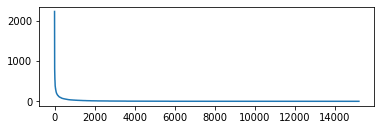

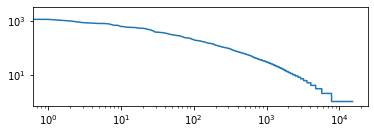

In [169]:
fig = plt.figure()
ax = fig.add_subplot(211)
plt.plot(range(len(counted_words)), counted_words['count'])
fig = plt.figure()
ax = fig.add_subplot(212)
plt.plot(range(len(counted_words)), counted_words['count'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

In [170]:
Reddit_Text = nltk.Text(word_lst)
redditIndex = nltk.text.ConcordanceIndex(Reddit_Text) 
redditIndex.print_concordance('student')

Displaying 25 of 207 matches:
ests/new?ticket_form_id=38824 banks student loans credit reports debt collector
 companies to match their employees student loan repayments in the same way com
rding to the article employees with student loan debt accumulate 50 less wealth
 by age 30 than their peers without student loan debt i think most of us with s
t loan debt i think most of us with student debt have at one point or another f
you would be able to make qualified student loan payments and have your company
ch month you made a payment on your student loan this does n't hurt people with
g my way out of that lovely college student debt i incurred over four years and
w.consumeraffairs.com news feds sue student loan servicer navient-011817.html >
lower payments > > deceived private student loan borrowers about requirements t
rom accruing > however most federal student loan borrowers earned the right in 
 newsroom cfpb sues nations largest student loan company navient failing borrow
om article

In [171]:
Reddit_Text.common_contexts(['loan'])

student_debt the_and the_i a_for student_forgiveness the_is car_and
student_you student_interest car_for your_balance the_in student_that
direct_program student_repayment a_and the_which of_| student_payments
student_servicer


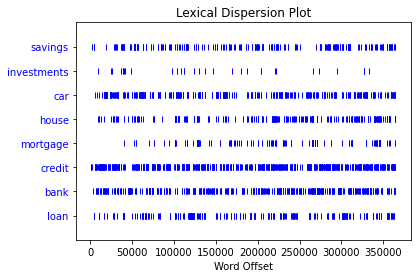

In [172]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
Reddit_Text.dispersion_plot(['savings','investments', 'car','house', 'mortgage' ,'credit', 'bank', 'loan'])
sns.set() #Re-enabling seaborn

In the plot, we find that most words appear evenly in the corpora, but investment and mortgage appear less often than others. 'Credit', 'Bank', 'loan' are the most popular.

## Normalize Token and Conditional Distribution

In [177]:
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

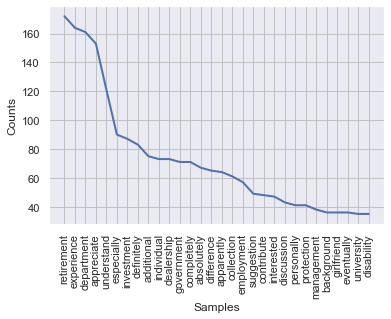

In [178]:
pf_df['words_count'] = pf_df['tokenized_text'].apply(lambda x: len(x))
pf_df['normalized_tokens'] = pf_df['tokenized_text'].apply(lambda x: normalizeTokens(x))
pf_df['normalized_tokens_count'] = pf_df['normalized_tokens'].apply(lambda x: len(x))

#.sum() adds together the lists from each row into a single list
# cfdist: conditional frequency distribution 
pf_cfdist = nltk.ConditionalFreqDist(((len(w), w) for w in pf_df['normalized_tokens'].sum()))
pf_cfdist[10].plot(30);

In [181]:
pf_cpdist = nltk.ConditionalProbDist(pf_cfdist, nltk.ELEProbDist)

#print the most common 3 letter word
print(pf_cpdist[3].max())

#And its probability
print(pf_cpdist[3].prob(pf_cpdist[3].max()))

#print the most common 5 letter word
print(pf_cpdist[5].max())

#And its probability
print(pf_cpdist[5].prob(pf_cpdist[3].max()))

pay
0.08665428346279411
money
2.112958776174277e-05


## Pos to word conditional distribution

In [186]:
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

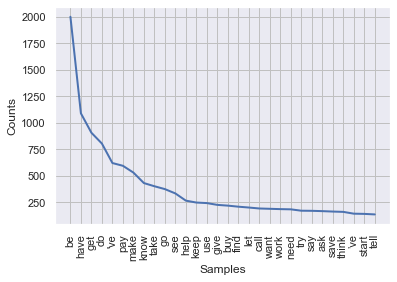

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [187]:
pf_df['normalized_tokens_POS'] = [spacy_pos(t) for t in pf_df['text']]
pf_cfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in pf_df['normalized_tokens_POS'].sum())
pf_cfdist_POStoWord['VB'].plot(30)

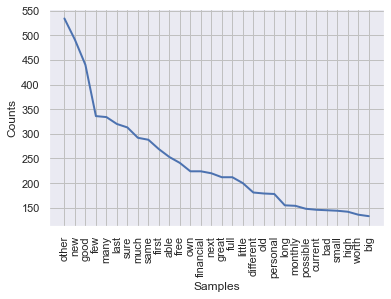

In [191]:
pf_cfdist_POStoWord['JJ'].plot(30);

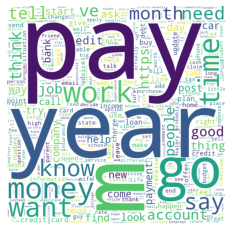

In [189]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(pf_df['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("pf_word_cloud.png", format = 'png')

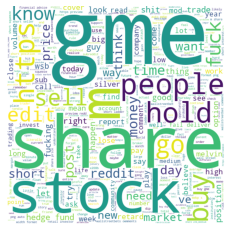

In [192]:
wsb_df['tokenized_text'] = wsb_df['text'].apply(lambda x: word_tokenize(x))
wsb_df['normalized_tokens'] = wsb_df['tokenized_text'].apply(lambda x: normalizeTokens(x))
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(wsb_df['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("wsb_word_cloud.png", format = 'png')

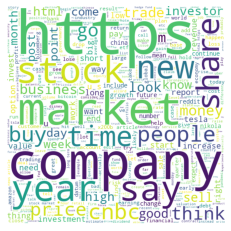

In [193]:
invt_df['tokenized_text'] = invt_df['text'].apply(lambda x: word_tokenize(x))
invt_df['normalized_tokens'] = invt_df['tokenized_text'].apply(lambda x: normalizeTokens(x))
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(invt_df['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("invt_word_cloud.png", format = 'png')

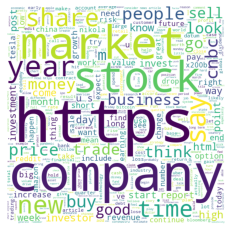

In [195]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(invt_df['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("invt_word_cloud.png", format = 'png')

## Part-of-Speech (POS) tagging

In POS tagging, we classify each word by its semantic role in a sentence. We will be using the in-built spaCy pos-tagging.

https://spacy.io/usage/linguistic-features

|#. |Tag |Description |
|---|----|------------|
|1.	|CC	|Coordinating conjunction
|2.	|CD	|Cardinal number
|3.	|DT	|Determiner
|4.	|EX	|Existential there
|5.	|FW	|Foreign word
|6.	|IN	|Preposition or subordinating conjunction
|7.	|JJ	|Adjective
|8.	|JJR|	Adjective, comparative
|9.	|JJS|	Adjective, superlative
|10.|	LS	|List item marker
|11.|	MD	|Modal
|12.|	NN	|Noun, singular or mass
|13.|	NNS	|Noun, plural
|14.|	NNP	|Proper noun, singular
|15.|	NNPS|	Proper noun, plural
|16.|	PDT	|Predeterminer
|17.|	POS	|Possessive ending
|18.|	PRP	|Personal pronoun
|19.|	PRP\$|	Possessive pronoun
|20.|	RB	|Adverb
|21.|	RBR	|Adverb, comparative
|22.|	RBS	|Adverb, superlative
|23.|	RP	|Particle
|24.|	SYM	|Symbol
|25.|	TO	|to
|26.|	UH	|Interjection
|27.|	VB	|Verb, base form
|28.|	VBD	|Verb, past tense
|29.|	VBG	|Verb, gerund or present participle
|30.|	VBN	|Verb, past participle
|31.|	VBP	|Verb, non-3rd person singular present
|32.|	VBZ	|Verb, 3rd person singular present
|33.|	WDT	|Wh-determiner
|34.|	WP	|Wh-pronoun
|35.|	WP$	|Possessive wh-pronoun
|36.|	WRB	|Wh-adverb

spaCy pos-tags word as we run it through the english language model. 

In [198]:
def sent_tokenize(word_list):
    doc = nlp(word_list)
    sentences = [sent.string.strip() for sent in doc.sents]
    return sentences

def tag_sents_pos(sentences):
    """
    function which replicates NLTK pos tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for token in sent:
            pos_sent.append((token.text, token.tag_))
        pos_sents.append(pos_sent)
    
    return pos_sents

In [199]:
# sort the most 10 recent posts
pf_recent = pf_df.sort_values('created_utc')[-10:]
pf_recent['sentences'] = pf_recent['text'].apply(lambda x: [word_tokenize(s) for s in sent_tokenize(x)])
pf_recent.index = range(len(pf_recent) - 1, -1,-1) #Reindex to make things nice in the future
pf_recent

,title,text,url,created_utc,tokenized_text,top_10_words,words_count,normalized_tokens,normalized_tokens_count,normalized_tokens_POS,sentences
9,A 3 month emergency fund may not be enough any...,I don't believe the 3 month e-fund advice hold...,https://www.reddit.com/r/personalfinance/comme...,1.613600e+09,"[I, do, n't, believe, the, 3, month, e, fund, ...",word count 23 week ...,424,"[believe, month, e, fund, advice, hold, water,...",171,"[(i, PRP), (do, VBP), (n't, RB), (believe, VB)...","[[I, do, n't, believe, the, 3, month, e, fund,..."
8,Things to do before you die: document your life.,My father surprised the hell out of everyone a...,https://www.reddit.com/r/personalfinance/comme...,1.613966e+09,"[My, father, surprised, the, hell, out, of, ev...",word count 25 accounts 9 16 ...,816,"[father, surprise, hell, couple, week, ago, pa...",341,"[(my, PRP$), (father, NN), (surprised, VBD), (...","[[My, father, surprised, the, hell, out, of, e..."
7,You're very unlikely to be audited by the IRS ...,We sometimes see questions asking if an indivi...,https://www.reddit.com/r/personalfinance/comme...,1.614007e+09,"[We, sometimes, see, questions, asking, if, an...",word count 12 audit 8 39 ...,447,"[question, ask, individual, tax, return, likel...",204,"[(we, PRP), (sometimes, RB), (see, VBP), (ques...","[[We, sometimes, see, questions, asking, if, a..."
6,My sorority is contacting me five years after ...,Basically the title. The current treasurer of ...,https://www.reddit.com/r/personalfinance/comme...,1.614110e+09,"[Basically, the, title, The, current, treasure...",word count 35 bill 4 ...,225,"[basically, title, current, treasurer, sororit...",81,"[(basically, RB), (the, DT), (title, NN), (., ...","[[Basically, the, title], [The, current, treas..."
5,I made a basic budgeting spreadsheet. Free to ...,"Hi guys, my hobby is creating spreadsheets and...",https://www.reddit.com/r/personalfinance/comme...,1.614402e+09,"[Hi, guys, my, hobby, is, creating, spreadshee...",word coun...,167,"[hi, guy, hobby, create, spreadsheet, decide, ...",102,"[(hi, UH), (guys, NNS), (,, ,), (my, PRP$), (h...","[[Hi, guys, my, hobby, is, creating, spreadshe..."
4,Someone tried to clear my checking account and...,Checked my bank balance this weekend and notic...,https://www.reddit.com/r/personalfinance/comme...,1.614626e+09,"[Checked, my, bank, balance, this, weekend, an...",word count 1 bank 5 19 webs...,330,"[check, bank, balance, weekend, notice, course...",126,"[(checked, VBD), (my, PRP$), (bank, NN), (bala...","[[Checked, my, bank, balance, this, weekend, a..."
3,"Medical Bills of $9,000 plus sent to collectio...",*Edit* - I just wanted to take a moment to tha...,https://www.reddit.com/r/personalfinance/comme...,1.614858e+09,"[Edit, I, just, wanted, to, take, a, moment, t...",word count 48 cardiologist ...,384,"[edit, want, moment, thank, take, time, share,...",123,"[(*, NFP), (edit, NN), (*, NFP), (-, :), (i, P...","[[Edit], [I, just, wanted, to, take, a, moment..."
2,Wells Fargo withdrew someone else's mortgage f...,I just refinanced my mortgage. I checked my a...,https://www.reddit.com/r/personalfinance/comme...,1.614919e+09,"[I, just, refinanced, my, mortgage, I, checked...",word count 23 nt 3 ...,137,"[refinance, mortgage, check, account, surprise...",56,"[(i, PRP), (just, RB), (refinanced, VBD), (my,...","[[I, just, refinanced, my, mortgage], [I, chec..."
1,Always download your bank/credit card statements!,I just want to make everyone aware of this sit...,https://www.reddit.com/r/personalfinance/comme...,1.615119e+09,"[I, just, want, to, make, everyone, aware, of,...",word count 8 statements 4 19...,337,"[want, aware, situation, consider, paperless, ...",127,"[(i, PRP), (just, RB), (want, VBP), (to, TO), ...","[[I, just, want, to, make, everyone, aware, of..."
0,Don't Pay H&R Block From Your Refund,Finishing up my tax return with H&R Block and ...,https://www.reddit.com/r/personalfinance/comme...,1.615257e+09,"[Finishing, up, my, tax, return, with

In [200]:
pf_recent['POS_sents'] = pf_recent['sentences'].apply(lambda x: tag_sents_pos(x))
countTarget = 'NN'
targetCounts = {}
for entry in pf_recent['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)


In [201]:
sortedTargets[:20]

[('time', 15),
 ('someone', 11),
 ('week', 10),
 ('audit', 10),
 ('tax', 9),
 ('return', 8),
 ('bank', 7),
 ('credit', 7),
 ('month', 6),
 ('year', 6),
 ('account', 6),
 ('money', 6),
 ('advice', 5),
 ('day', 5),
 ('process', 5),
 ('life', 5),
 ('password', 5),
 ('m', 5),
 ('situation', 5),
 ('income', 5)]

## Collocations

In [204]:
pf_bigrams = nltk.collocations.BigramCollocationFinder.from_words(pf_df['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(pf_bigrams.N))

There are 150405 bigrams in the finder


In [206]:
def bigramScoring(count, wordsTuple, total):
    return count

print(pf_bigrams.nbest(bigramScoring, 20))

[('credit', 'card'), ('$', 'month'), ('student', 'loan'), ('feel', 'like'), ('$', '$'), ('r', 'personalfinance'), ('pay', '$'), ('edit', 'thank'), ('year', 'ago'), ('bank', 'account'), ('m', 'sure'), ('credit', 'score'), ('m', 'go'), ('saving', 'account'), ('emergency', 'fund'), ('year', 'old'), ('let', 'know'), ('debit', 'card'), ('save', 'money'), ('interest', 'rate')]


In [479]:
pd.DataFrame(pf_bigrams.nbest(bigramScoring, 20))

,0,1
0,credit,card
1,$,month
2,student,loan
3,feel,like
4,$,$
5,r,personalfinance
6,pay,$
7,edit,thank
8,year,ago
9,bank,account


In [481]:
pd.DataFrame(pf_bigrams.score_ngrams(bigram_measures.likelihood_ratio)[:20])

,0,1
0,"(credit, card)",2643.261940
1,"(r, personalfinance)",1549.953318
2,"(student, loan)",1459.923489
3,"(emergency, fund)",867.181741
4,"(wells, fargo)",819.732516
5,"(feel, like)",772.068875
6,"(credit, score)",678.797379
7,"(year, ago)",640.507001
8,"($, month)",628.442004
9,"(debit, card)",571.536290


We can have a look at the bigram measures, including student_t, chi_sq, likelihood_ratio, pmi

In [207]:
# bigram_measures
# likelihood ratio
bigram_measures = nltk.collocations.BigramAssocMeasures()
pf_bigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]

[(('credit', 'card'), 2643.2619400819976),
 (('r', 'personalfinance'), 1549.953318006665),
 (('student', 'loan'), 1459.9234891677934),
 (('emergency', 'fund'), 867.1817406177476),
 (('wells', 'fargo'), 819.732515704891),
 (('feel', 'like'), 772.0688747185934),
 (('credit', 'score'), 678.797378680353),
 (('year', 'ago'), 640.5070011537314),
 (('$', 'month'), 628.4420037390287),
 (('debit', 'card'), 571.5362900234319),
 (('=', 'plubok8lzixw90vxgryjqwfpf4bz'), 563.0307798682496),
 (('interest', 'rate'), 503.770829707711),
 (('bank', 'america'), 503.41878933460214),
 (('domain', 'core'), 496.1811526563885),
 (('long', 'term'), 495.73067983679846),
 (('m', 'sure'), 489.98542119047005),
 (('gon', 'na'), 485.10639981072643),
 (('saving', 'account'), 453.31975664106153),
 (('edit', 'thank'), 448.848134788548),
 (('plubok8lzixw90vxgryjqwfpf4bz', 'tyegn'), 446.65061698599175),
 (('social', 'security'), 435.6124884043912),
 (('personalfinance', 'wiki'), 434.58645512939734),
 (('health', 'insuranc

We can also look at student_t. Most words are similar but the rank is still a little different.

In [208]:
# bigram_measures = nltk.collocations.BigramAssocMeasures()
pf_bigrams.score_ngrams(bigram_measures.student_t)[:40]

[(('credit', 'card'), 18.42461212457623),
 (('student', 'loan'), 12.524632768426663),
 (('$', 'month'), 12.264676825679043),
 (('feel', 'like'), 10.586200411103942),
 (('r', 'personalfinance'), 10.429105281204851),
 (('year', 'ago'), 9.576361403556929),
 (('edit', 'thank'), 9.389018527388918),
 (('credit', 'score'), 9.31923453797322),
 (('m', 'sure'), 9.288765031184019),
 (('bank', 'account'), 9.192520067374602),
 (('saving', 'account'), 8.707324971986484),
 (('emergency', 'fund'), 8.584084887571505),
 (('m', 'go'), 8.437960111186),
 (('year', 'old'), 8.221385454031651),
 (('pay', '$'), 7.954511123518605),
 (('debit', 'card'), 7.823407943088727),
 (('interest', 'rate'), 7.750402085933433),
 (('let', 'know'), 7.747792136699357),
 (('save', 'money'), 7.523519441345084),
 (('long', 'term'), 7.310689421347088),
 (('$', '$'), 7.256343045651317),
 (('bank', 'america'), 7.23920994914636),
 (('tax', 'return'), 6.997538673487378),
 (('health', 'insurance'), 6.95791173355749),
 (('$', 'k'), 6.93

In [482]:
pd.DataFrame(pf_bigrams.score_ngrams(bigram_measures.student_t)[:20])

,0,1
0,"(credit, card)",18.424612
1,"(student, loan)",12.524633
2,"($, month)",12.264677
3,"(feel, like)",10.586200
4,"(r, personalfinance)",10.429105
5,"(year, ago)",9.576361
6,"(edit, thank)",9.389019
7,"(credit, score)",9.319235
8,"(m, sure)",9.288765
9,"(bank, account)",9.192520


Have a look at trigrams:

In [209]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
pf_Trigrams = nltk.collocations.TrigramCollocationFinder.from_words(pf_df['normalized_tokens'].sum())
pf_Trigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('credit', 'card', 'debt'), 6.162260397933701),
 (('r', 'personalfinance', 'wiki'), 5.830941893960936),
 (('domain', 'core', 'finance'), 5.47722256796448),
 (('finance', 'domain', 'core'), 5.47722256796448),
 (('=', 'plubok8lzixw90vxgryjqwfpf4bz', 'tyegn'), 5.099017563395099),
 (('economic', 'finance', 'domain'), 4.795828274616905),
 (('pay', 'credit', 'card'), 4.679944671929528),
 (('use', 'credit', 'card'), 4.356131495185678),
 (('$', '$', '$'), 4.245524792201942),
 (('long', 'story', 'short'), 4.123074350472724),
 (('credit', 'card', 'company'), 4.118809934477559),
 (('file', 'police', 'report'), 3.8729368751956263),
 (('thank', 'take', 'time'), 3.8693287762100086),
 (('m', 'year', 'old'), 3.869165411738855),
 (('social', 'security', 'number'), 3.7416207491107962),
 (('m', 'gon', 'na'), 3.6055413981988798),
 (('$', 'credit', 'card'), 3.5857604162808676),
 (('=', '=', '='), 3.463990060792875),
 (('open', 'credit', 'card'), 3.4622959800980193),
 (('pay', 'student', 'loan'), 3.460939

In [483]:
pd.DataFrame(pf_Trigrams.score_ngrams(trigram_measures.student_t)[:20])

,0,1
0,"(credit, card, debt)",6.162260
1,"(r, personalfinance, wiki)",5.830942
2,"(domain, core, finance)",5.477223
3,"(finance, domain, core)",5.477223
4,"(=, plubok8lzixw90vxgryjqwfpf4bz, tyegn)",5.099018
5,"(economic, finance, domain)",4.795828
6,"(pay, credit, card)",4.679945
7,"(use, credit, card)",4.356131
8,"($, $, $)",4.245525
9,"(long, story, short)",4.123074


## Distributional distances

If we want to compare different corpora, we need a distance or divergence that compares the two distributions.

We will use the: 

+ Kullback-Leibler (KL) divergence
+ $\chi^2$ divergence
+ Kolmogorov-Smirnov (KS) distance
+ Wasserstein distance

### Kullback-Leibler and $x^2$ divergences ###

KL and $\chi^2$ divergences are members of the broader <a "href=https://en.wikipedia.org/wiki/F-divergence" target="_blank">$f$-divergence</a> family, a function of $D_f (P || Q)$ that calculates the difference between two probability distributions P and Q. The KL $f(t)$ is $ t \text{ log } t $, while the $\chi^2$ is $t^2-1$. KL comes from information and $\chi^2$ from measure theory. As such, the KL divergence computes the relative entropy between two distributions--how they differ in bits, while the $\chi^2$ whether the same statistical inferences can be drawn from them both.  

Specifically, given two discrete probability distributions $P$ and $Q$, the Kullback-Leibler divergence from $Q$ to $P$ is defined as:

$D_{\mathrm{KL}}(P\|Q) = \sum_i P(i) \, \log\frac{P(i)}{Q(i)}$.

The [scipy.stats.entropy()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html) function does the calculation for you, which takes in two arrays of probabilities and computes the KL divergence. Note that the KL divergence is in general not commutative, i.e. $D_{\mathrm{KL}}(P\|Q) \neq D_{\mathrm{KL}}(Q\|P)$ .

Also note that the KL divernce is the sum of elementwise divergences. Scipy provides [scipy.special.kl_div()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.kl_div.html#scipy-special-kl-div) which calculates elementwise divergences for you.

The $\chi^2$ Divergence is defined as:

$D_{\mathrm{\chi^2}}(P\|Q) = \sum_i \left(\frac{P(i)}{Q(i)}-1\right)^2$. 

This is also noncommutative, and the code can be drawn directly from scipy.

### Kolmogorov-Smirnov ###

The two-sample Kolmogovorov-Smirnov test statistic calculates the distance between the cumulative distribution function of the two distributions to be compared, and, along with the $x^2$ divergence, is among the most common approaches two calculating a distance in statistics. It can be interpreted as a test of whether two distributions are drawn from the same underlying distribution. As with the others, the code is readily available in scipy.

### Wasserstein Distance ###

When this is computed on a Euclidian metric structure (e.g., numbers of words), this is also known as the earth mover’s distance, because it can be seen as the minimum amount of "work" required to transform $P$ into $Q$, where "work" is measured as the amount of distribution weight that must be moved, multiplied by the distance it has to be moved.



In [211]:
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pandas.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pandas.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

In [215]:
corpora = []
for index, row in pf_df.iterrows():
    if len(corpora) > 10:
        break
    corpora.append(row['tokenized_text'])
    
corpora_s = []
corpora_nons = []
for corpus in corpora:
    s = []
    nons = []
    doc = nlp(' '.join(corpus))
    for word in doc:
        if word.is_stop:
            s.append(word.text)
        else:
            nons.append(word.text)
    corpora_s.append(s)
    corpora_nons.append(nons)
    
# Because many reddit articles have very long names, I only use first 20 characters
fileids = [title[:40] for title in list(pf_df['title'])[0:11]]

### KL divergence

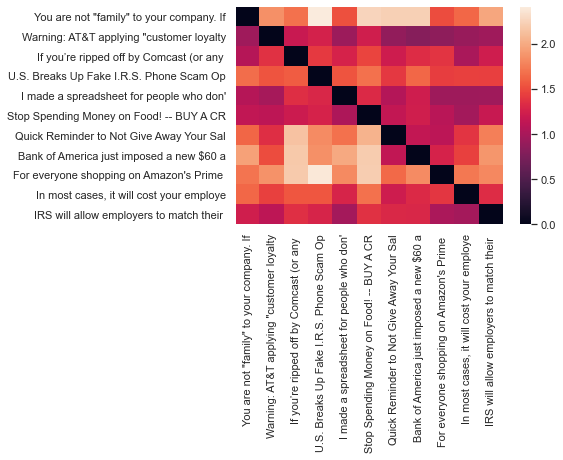

In [216]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference = 'KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

### The multidimensional scaling of the matrix

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\manifold\_mds.py:441: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


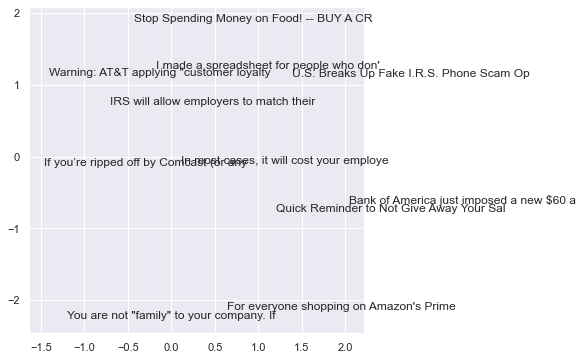

In [221]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(fileids):
    ax.annotate(txt, (x[i],y[i]))

In [224]:
# Have a look at the full titles of each article
full_title =list(pf_df['title'])[0:11]
full_title

['You are not "family" to your company. If you have an opportunity to better yourself, take it. They will do the same when it comes to cutting ties with you.',
 'Warning: AT&T applying "customer loyalty speed upgrades" without customer consent',
 'If you’re ripped off by Comcast (or any internet company), Wells Fargo (or any bank/student lender), or Aetna (or any health insurance company), here’s how to get your money back.',
 'U.S. Breaks Up Fake I.R.S. Phone Scam Operation -- 21 people sentenced for up to 20 yrs, 32 in India indicted',
 "I made a spreadsheet for people who don't know how to budget!",
 'Stop Spending Money on Food! -- BUY A CROCKPOT',
 'Quick Reminder to Not Give Away Your Salary Requirement in a Job Interview',
 'Bank of America just imposed a new $60 annual fee on their previously free personal savings account.',
 'For everyone shopping on Amazon\'s Prime Day: "savings" from sales aren\'t savings if you weren\'t already planning on buying the item.',
 'In most cases

From the multidimensional scaling of the matrix, we find that these blogs are scattered relatively evenly, but the article 'You are not "family" to your company. If you have an opportunity to better yourself, take it. They will do the same when it comes to cutting ties with you.' and  'For everyone shopping on Amazon\'s Prime Day: "savings" from sales aren\'t savings if you weren\'t already planning on buying the item.' are a little far away from others. 

### $\chi^2$ Divergence

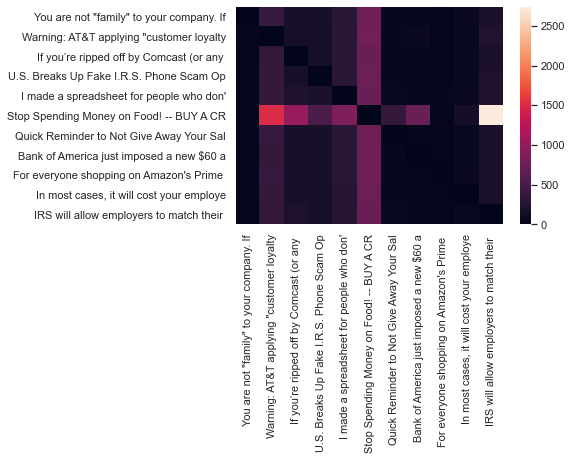

In [225]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference="Chi2"))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

### KS distance

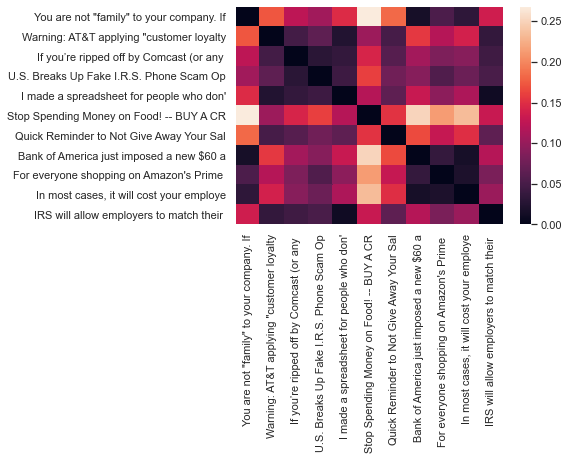

In [226]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='KS'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

### Wasserstein or "earth mover's" Distance

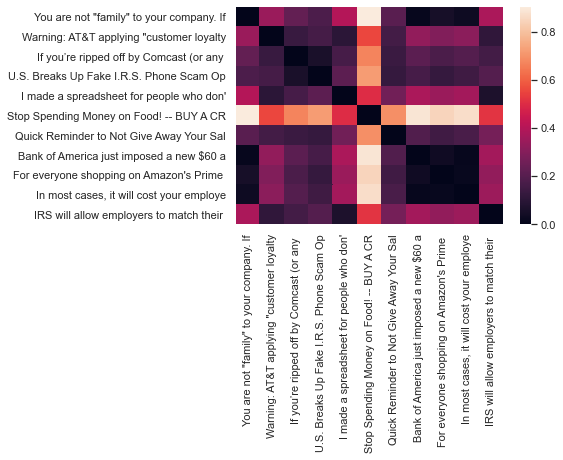

In [484]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='Wasserstein'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

# Discovering Patterns, Clusters, and Topics

What do we want to do here? We want to do vectorization, i.e., converting texts into numerical features (vectors) as required by machine learning algorithms. And this is what feature_extraction module does: to extract features from texts in a format as required by ML algorithms. feature_extraction module has four classes: CountVectorizer, DictVectorizer, TfidfVectorizer, and FeatureHasher. Here, we use CountVectorizer, but we'll also use TfidfVectorizer as well below.

There are various strategies by which we extract features. Here, we use CountVectorizer, and, in particular, we use 'Bag of Words' representation. In other words, the features we hope to extract from the texts are each individual token occurrence frequency. We simply count the the occurrence of each token in each document. So, here, we get a document-term-matrix, in which documents are characterized by the occurrences of tokens. Other forms of features, such as the relative position information of words, are ignored. We'll see other types of representations and strategies as well soon, such as N-gram (by the way, we can do n-gram with CountVectorizer. CountVectorizer class takes a set of parameters, such as analyzer, which you can specify the n-gram). 

In [228]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

In [233]:
pf_df = pd.read_csv('data\pf_top.csv', index_col = 0).dropna().reset_index(drop=True)
wsb_df = pd.read_csv('data\wsb_top.csv', index_col = 0).dropna().reset_index(drop=True)
invt_df = pd.read_csv('data\invt_top.csv', index_col = 0).dropna().reset_index(drop=True)

In [234]:
pf_df['category'] = 'personal finance' 
wsb_df['category'] = 'wall street bets'
invt_df['category'] = 'investing'

In [240]:
# create a new data frame with three true clusters
combined_df = pd.concat([pf_df, wsb_df, invt_df]).reset_index(drop=True)

In [242]:
combined_df.tail(1)

,title,text,url,created_utc,category
2089,"During the 2008 recession, some people managed...",Sorry I'm very new to this but what statistics...,https://www.reddit.com/r/investing/comments/ek...,1.578242e+09,investing


In [244]:
# Initialize word count vectors
CountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
# Then trained
vects = CountVectorizer.fit_transform(combined_df['text'])
print(vects.shape)

(2090, 23746)


In [248]:
# Use TF-IDF
#initialize
TFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(vects)
#train
tf = TFTransformer.transform(vects)
print(tf.shape)

(2090, 23746)


In [249]:
#initialize
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
tf_vects = TFVectorizer.fit_transform(combined_df['text'])
print(tf_vects.shape)

(2090, 1000)


Have a look at what we have in the tf-idf data

In [251]:
list(zip(CountVectorizer.vocabulary_.keys(), tf.data))[:20]

[('people', 0.11332419893364157),
 ('tend', 0.1835132279306761),
 ('to', 0.09610710695393014),
 ('feel', 0.09470008571280736),
 ('sense', 0.08903314520186814),
 ('of', 0.10793445675285243),
 ('guilt', 0.06056243550847235),
 ('when', 0.06086509664311002),
 ('it', 0.11193538471891115),
 ('comes', 0.09749360350280029),
 ('leaving', 0.040474511462745465),
 ('job', 0.26143608572479415),
 ('like', 0.13243129045778707),
 ('they', 0.061303243896326895),
 ('owe', 0.0784113671384112),
 ('them', 0.14544737565852936),
 ('or', 0.13155300042947904),
 ('their', 0.07264162351945413),
 ('coworkers', 0.09529078303883413),
 ('something', 0.12610204900361077)]

In [489]:
# tmp = pd.DataFrame(list(zip(CountVectorizer.vocabulary_.keys(), tf.data)), columns=['word','tf-idf']).sort_values(by='tf-idf',ascending=False)[:10]
tmp = pd.DataFrame(list(zip(CountVectorizer.vocabulary_.keys(), tf.data)), columns=['word','tf-idf'])
tmp[:10]

,word,tf-idf
0,people,0.113324
1,tend,0.183513
2,to,0.096107
3,feel,0.094700
4,sense,0.089033
5,of,0.107934
6,guilt,0.060562
7,when,0.060865
8,it,0.111935
9,comes,0.097494


## Flat Clustering with $K$-means

Lets start with $k$-means, an approach that begins with random clusters of predefined number, then iterates cluster reassignment and evaluates the new clusters relative to an objective function, recursively.

To do this we will need to know how many clusters we are looking for. Here the *true number* of clusters is 4. Of course, in most cases you would not know the number in advance.

In [252]:
# Because there are many different topics, we choose 13
km = sklearn.cluster.KMeans(n_clusters=3, init='k-means++')
km.fit(tf_vects)

KMeans(n_clusters=3)

In [253]:
print("The available metrics are: {}".format([s for s in dir(sklearn.metrics) if s[0] != '_']))
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(combined_df['category'], km.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(combined_df['category'], km.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(combined_df['category'], km.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(combined_df['category'], km.labels_)))

The available metrics are: ['ConfusionMatrixDisplay', 'DetCurveDisplay', 'PrecisionRecallDisplay', 'RocCurveDisplay', 'SCORERS', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'max_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'mean_gamma_deviance', 'mean_poisson_deviance', 'mean_squared_error', 'mean_squared_l

We can find that our data has  homogeneity and completeness all nearly 0.50, which means that there is no perfect alignment. No cluster contains all texts from one class, and no cluster is exacterly one class.

According to the Adjusted Rand Index, our clusters are much better than a random assignment, which ARI is 0 (so compared to 0, 0.513 is a satisfactory value).

In [257]:
combined_df['kmeans_predictions'] = km.labels_
combined_df[combined_df['category'] == 'personal finance'][:10]

,title,text,url,created_utc,category,kmeans_predictions
0,"You are not ""family"" to your company. If you h...",People tend to feel a sense of guilt when it c...,https://www.reddit.com/r/personalfinance/comme...,1.583364e+09,personal finance,2
1,"Warning: AT&T applying ""customer loyalty speed...",So over the holiday I received an email with a...,https://www.reddit.com/r/personalfinance/comme...,1.514842e+09,personal finance,2
2,If you’re ripped off by Comcast (or any intern...,Update 3: $3332 returned!\n\nUpdate 2: Holy mo...,https://www.reddit.com/r/personalfinance/comme...,1.522622e+09,personal finance,2
3,U.S. Breaks Up Fake I.R.S. Phone Scam Operatio...,[Some good news](https://www.nytimes.com/2018/...,https://www.reddit.com/r/personalfinance/comme...,1.532374e+09,personal finance,2
4,I made a spreadsheet for people who don't know...,Hey guys! last year I made a spreadsheet to he...,https://www.reddit.com/r/personalfinance/comme...,1.557934e+09,personal finance,2
5,Stop Spending Money on Food! -- BUY A CROCKPOT,**Holy shit at the money people spend on food!...,https://www.reddit.com/r/personalfinance/comme...,1.506910e+09,personal finance,2
6,Quick Reminder to Not Give Away Your Salary Re...,I know I've read this here before but had a re...,https://www.reddit.com/r/personalfinance/comme...,1.520530e+09,personal finance,2
7,Bank of America just imposed a new $60 annual ...,Today I noticed a $5 fee was deducted from my ...,https://www.reddit.com/r/personalfinance/comme...,1.510941e+09,personal finance,2
8,"For everyone shopping on Amazon's Prime Day: ""...",This is a trap a lot of people fall into (myse...,https://www.reddit.com/r/personalfinance/comme...,1.531747e+09,personal finance,2
9,"In most cases, it will cost your employer far ...","The cost of recruiting, onboarding/training, e...",https://www.reddit.com/r/personalfinance/comme...,1.515689e+09,personal finance,2


In [516]:
np.arange(1,3,0.5)

array([1. , 1.5, 2. , 2.5])

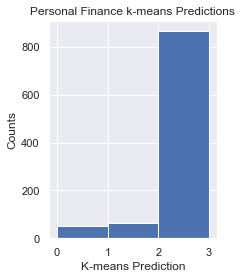

In [530]:
x = combined_df[combined_df['category'] == 'personal finance']['kmeans_predictions']
plt.figure(figsize=(3,4))
plt.hist(x,bins=range(0,4),density=False)  # density=False would make counts, Ture= Probability
plt.ylabel('Counts')
plt.xlabel('K-means Prediction')
plt.title('Personal Finance k-means Predictions')
plt.show()

In [258]:
combined_df[combined_df['category'] == 'wall street bets'][:10]

,title,text,url,created_utc,category,kmeans_predictions
977,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,LEAVE ROBINHOOD. They dont deserve to make mon...,https://www.reddit.com/r/wallstreetbets/commen...,1.611842e+09,wall street bets,1
978,"Hey everyone, Its Mark Cuban. Jumping on to do...",Lets Go !,https://www.reddit.com/r/wallstreetbets/commen...,1.612277e+09,wall street bets,1
979,"An Open Letter to Melvin Capital, CNBC, Boomer...","**Mods do not delete, this is important to me...",https://www.reddit.com/r/wallstreetbets/commen...,1.611810e+09,wall street bets,2
980,Like this post if you are holding!!💎 The real ...,"Buy more during dips if you can, but at least ...",https://www.reddit.com/r/wallstreetbets/commen...,1.611851e+09,wall street bets,1
981,Where do we go from here and who is going to s...,We have grown to the kind of size we only drea...,https://www.reddit.com/r/wallstreetbets/commen...,1.611794e+09,wall street bets,2
982,"Mark Cuban said ""once the brokerage stops rest...",Let's show them what we're made of: retards.,https://www.reddit.com/r/wallstreetbets/commen...,1.612496e+09,wall street bets,1
983,Today wasn’t a bloodbath for $GME or $AMC. WE ...,DD I saw posted elsewhere: hedge funds are try...,https://www.reddit.com/r/wallstreetbets/commen...,1.612228e+09,wall street bets,1
984,"Can you say ""CLASS ACTION LAWSUIT"". Fuck you R...",Edit 6: I created r/ClassActionRobinHood for p...,https://www.reddit.com/r/wallstreetbets/commen...,1.611840e+09,wall street bets,1
985,I suspect the hedgies are illegally covering t...,TLDR; **Melvin and gang hasn't covered shit. T...,https://www.reddit.com/r/wallstreetbets/commen...,1.612235e+09,wall street bets,1
986,There is no silver short squeeze happening. NO...,Silver might go up nicely and for a time but d...,https://www.reddit.com/r/wallstreetbets/commen...,1.612181e+09,wall street bets,1


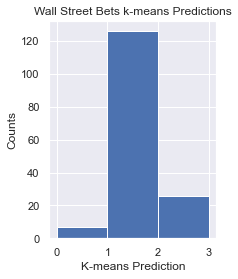

In [534]:
x = combined_df[combined_df['category'] == 'wall street bets']['kmeans_predictions']
plt.figure(figsize=(3,4))
plt.hist(x,bins=range(0,4),density=False)  # density=False would make counts, Ture= Probability
plt.ylabel('Counts')
plt.xlabel('K-means Prediction')
plt.title('Wall Street Bets k-means Predictions')
plt.show()

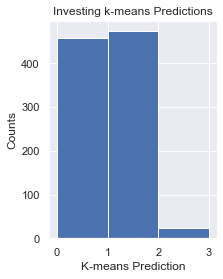

In [533]:
x = combined_df[combined_df['category'] == 'investing']['kmeans_predictions']
plt.figure(figsize=(3,4))
plt.hist(x,bins=range(0,4),density=False)  # density=False would make counts, Ture= Probability
plt.ylabel('Counts')
plt.xlabel('K-means Prediction')
plt.title('Investing k-means Predictions')
plt.show()

In [259]:
combined_df[combined_df['category'] == 'investing'][:10]

,title,text,url,created_utc,category,kmeans_predictions
1136,Robinhood and other brokers literally blocking...,"See title. Can't buy these stocks on RH, but c...",https://www.reddit.com/r/investing/comments/l6...,1.611841e+09,investing,1
1137,United Airlines stock down over 5% premarket t...,http://www.marketwatch.com/story/uniteds-stock...,https://www.reddit.com/r/investing/comments/64...,1.491907e+09,investing,1
1138,"Bitcoin was nearly $20,000 a year ago today",It's always interesting looking at the past an...,https://www.reddit.com/r/investing/comments/a6...,1.545053e+09,investing,1
1139,Jim Cramer Gave an Interview in 2006 on how th...,[https://www.reuters.com/article/cramer-interv...,https://www.reddit.com/r/investing/comments/l9...,1.612061e+09,investing,0
1140,Historically it's way better to invest at mark...,"Found this 2018 article, interesting/fun fact:...",https://www.reddit.com/r/investing/comments/lh...,1.613075e+09,investing,1
1141,Uber Fined $649 Million for Saying Drivers Are...,New Jersey fined Uber $649 Million for Saying ...,https://www.reddit.com/r/investing/comments/dw...,1.573795e+09,investing,0
1142,"Long Island Ice Tea Corp, a beverage company, ...",https://www.marketwatch.com/story/long-island-...,https://www.reddit.com/r/investing/comments/7l...,1.513869e+09,investing,0
1143,Emotional involvement has never been this high...,"First of all, I can't wait to be berated in th...",https://www.reddit.com/r/investing/comments/la...,1.612187e+09,investing,1
1144,TIL if you had bought EA stock after they were...,"In April 2013, The Consumerist awarded EA the ...",https://www.reddit.com/r/investing/comments/7c...,1.510602e+09,investing,1
1145,"Tesla posts profit of $2.92, stock jumps 7 per...",https://www.cnbc.com/2018/10/24/tesla-earnings...,https://www.reddit.com/r/investing/comments/9r...,1.540412e+09,investing,0


We found that, almost all texts in personal finance category are in cluster 2, which means they are really different (far) from others. 

80% posts from wall street bets are in cluster 1, 16.7% of its posts are in cluster 2, so we have the conclusion that usually posts from wall street bets are different from others, but some times they could be devided in cluster 2 (which means they have personal finance problem such as tax, debt or retirement), and they haven't realize subreddit 'personal finance' is the best choice

However, for category 'investing', the k-means cluster label is really unstable and inconsistent, in 10 posts, there are 4 in cluster 0, 5 in cluster 1, 

### Interrogate the cluster contents

In [262]:
numClusters = len(set(combined_df['category']))
numClusters

3

In [263]:
terms = TFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 com
 https
 www
 cnbc
 html
 2020
 2019
 2018
 news
 http


Cluster 1:
 market
 stock
 https
 com
 gme
 stocks
 price
 company
 year
 people


Cluster 2:
 just
 money
 credit
 account
 edit
 ve
 don
 pay
 job
 card




### Plot clusters & features after reducing with PCA

In [264]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 3).fit(tf_vects.toarray())
reduced_data = pca.transform(tf_vects.toarray())

In [265]:
components = pca.components_
# Note: the parameter in order_centroids[:,:10] will influence the density of words
keyword_ids = list(set(order_centroids[:,:5].flatten())) #Get the ids of the most distinguishing words(features) from your kmeans model.
words = [terms[i] for i in keyword_ids]#Turn the ids into words.
x = components[:,keyword_ids][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids][1,:]

In [268]:
colordict = {'personal finance':'blue',
 'wall street bets':'red',
 'investing':'yellow'}
colors = [colordict[c] for c in combined_df['category']]
print("The categories' colors are:\n{}".format(colordict.items()))

The categories' colors are:
dict_items([('personal finance', 'blue'), ('wall street bets', 'red'), ('investing', 'yellow')])


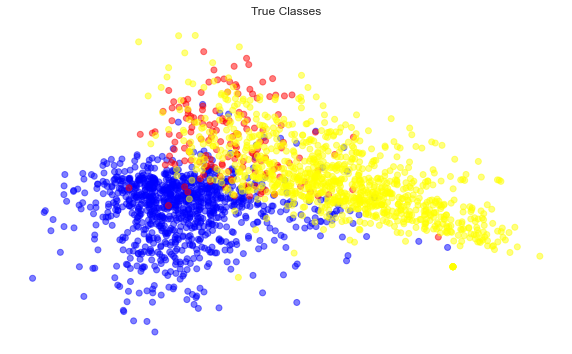

In [269]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

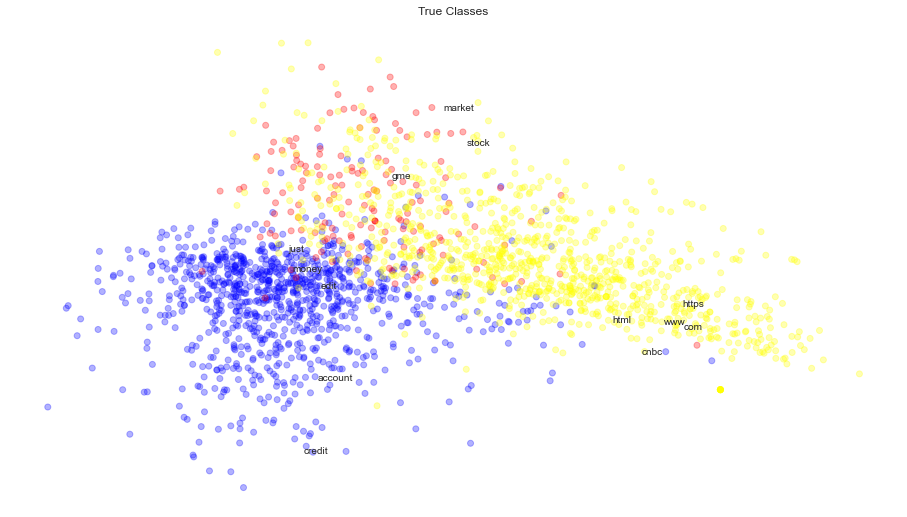

In [270]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.3, label = colors)
for i, word in enumerate(words):
    ax.annotate(word, (x[i],y[i]))
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

We can find that some words across clusters share the words with similar meaning. For example, the coral color for , lime colour for, and orange color for 'planning', 'student loan', 'debt' clusters are near to each other with feature vectors such as "loans", "student", "paying", "debt", "month"

We can also draw plot for predicted clusters.

In [274]:
categories = list(combined_df.category.unique())
categories

['personal finance', 'wall street bets', 'investing']

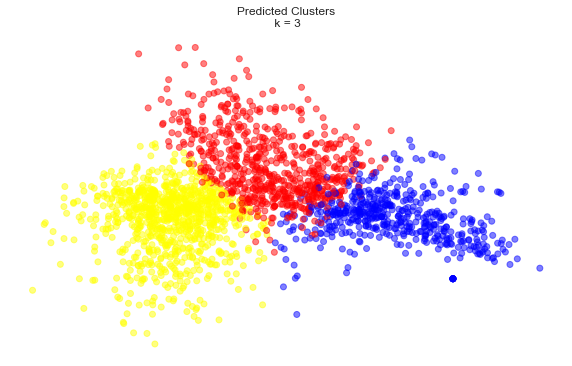

In [276]:

colors_p = [colordict[categories[l]] for l in km.labels_]
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters\n k = 3')
plt.show()

We can find that, similar colors in predicted clusters are nearer to each other. Maybe bacause the size of dataframes are not equal, (there are so many posts in wall street bets subreddit lack content--they only use photo, video, gif or emoji), many topics are related such as planning and budgeting. So in manual labeling they are a lot of overlaps but in machine learning, they could be seperated better.

### Identify the optimal cluster number with Silhouette analysis

In [282]:
import matplotlib

In [291]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


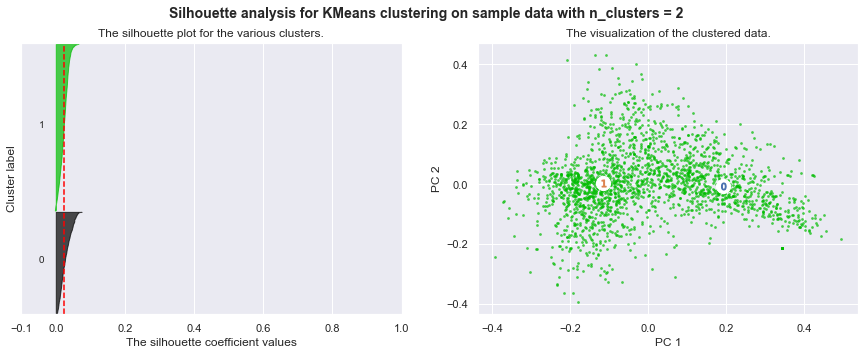

For n_clusters = 2, The average silhouette_score is : 0.025


In [293]:
plotSilhouette(2, X)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


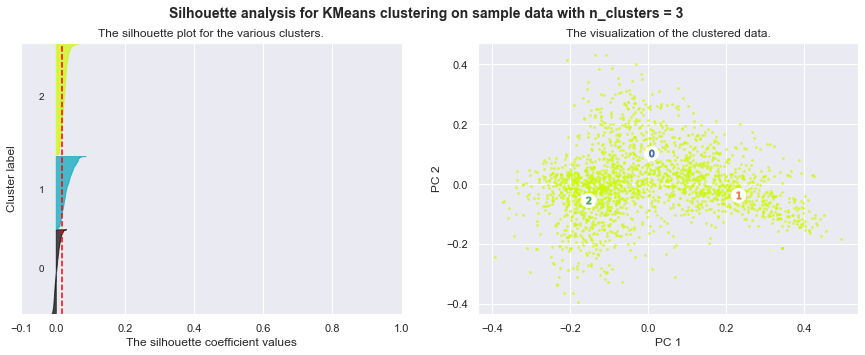

For n_clusters = 3, The average silhouette_score is : 0.019


In [292]:
X = tf_vects.toarray()
plotSilhouette(3, X)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


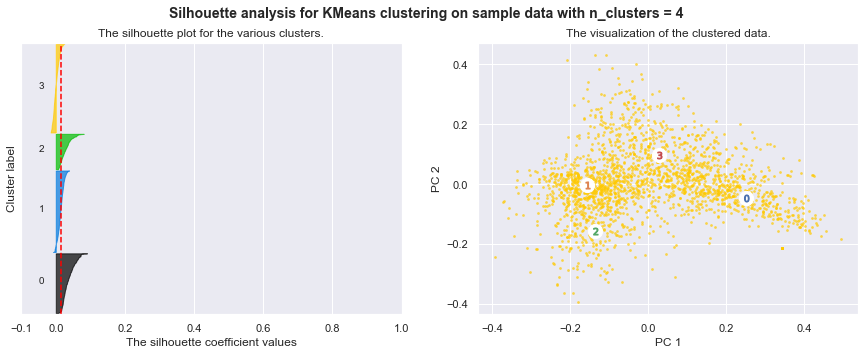

For n_clusters = 4, The average silhouette_score is : 0.016


In [294]:
plotSilhouette(4, X)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


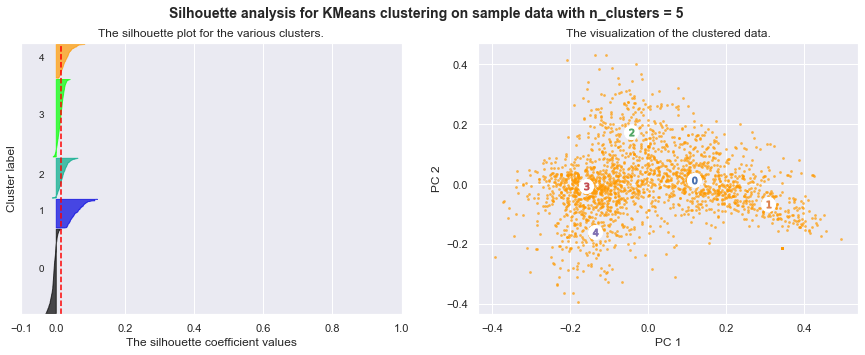

For n_clusters = 5, The average silhouette_score is : 0.014


In [297]:
plotSilhouette(5, X)

##  Hierarchically cluster my documents and visualization

### Draw dendrogram

In [299]:
# create word occurance matrix
coocmat = tf_vects * tf_vects.T
coocmat.setdiag(0)

In [302]:
selectIndices = []
indexToCat = []
for c in set(combined_df['category']):
    selectIndices += list(combined_df[combined_df['category'] == c].index)[:50]
    indexToCat += [c] * 50
#     combined_df.groupby('category').sum()

In [303]:
subCoocMat = coocmat[selectIndices,:][:,selectIndices]

In [304]:
linkage_matrix = scipy.cluster.hierarchy.ward(subCoocMat.toarray())
linkage_matrix[:10]

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([[  1.        ,  52.        ,   0.33227319,   2.        ],
       [100.        , 125.        ,   0.37407421,   2.        ],
       [ 20.        , 151.        ,   0.38580279,   3.        ],
       [ 39.        , 150.        ,   0.40470051,   3.        ],
       [ 59.        ,  79.        ,   0.44283934,   2.        ],
       [ 76.        ,  80.        ,   0.45141376,   2.        ],
       [132.        , 138.        ,   0.45978704,   2.        ],
       [147.        , 153.        ,   0.46923523,   4.        ],
       [139.        , 149.        ,   0.48285151,   2.        ],
       [148.        , 156.        ,   0.48466462,   3.        ]])

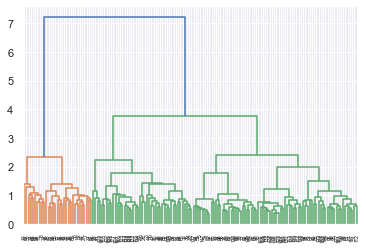

In [305]:
dendDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, get_leaves=True)

To make the plot easier to read:


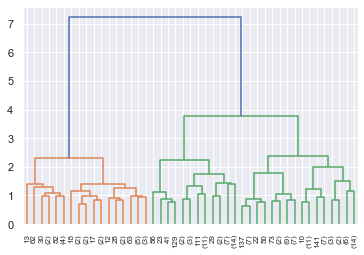

In [306]:
dendrogramDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, p=5, truncate_mode='level', get_leaves=True)

### Compare with K-means

In [307]:
# break the tree into 3 clusters
hierarchicalClusters = scipy.cluster.hierarchy.fcluster(linkage_matrix, 3, 'maxclust')
hierarchicalClusters

array([2, 3, 1, 2, 2, 3, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1,
       3, 2, 3, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 3, 2, 2, 2, 3,
       2, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 1, 1, 2, 1,
       3, 3, 2, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 2, 3, 2, 2,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3,
       3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2], dtype=int32)

In [310]:
linkage_matrix_full = scipy.cluster.hierarchy.ward(coocmat.toarray())
hierarchicalClusters_full = scipy.cluster.hierarchy.fcluster(linkage_matrix_full, 3, 'maxclust')
print("For Ward Hierarchy complete clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(combined_df['category'], hierarchicalClusters_full)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(combined_df['category'], hierarchicalClusters_full)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(combined_df['category'], hierarchicalClusters_full)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(combined_df['category'], hierarchicalClusters_full)))

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


For Ward Hierarchy complete clusters:
Homogeneity: 0.304
Completeness: 0.268
V-measure: 0.285
Adjusted Rand Score: 0.367


In [311]:
print("For k-means clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(combined_df['category'], km.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(combined_df['category'], km.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(combined_df['category'], km.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(combined_df['category'], km.labels_)))

For k-means clusters:
Homogeneity: 0.504
Completeness: 0.428
V-measure: 0.463
Adjusted Rand Score: 0.513


From the above dataframe we can find that this outcome is not as good k-means. Maybe we have too many words for ward to build the hierarchy clusterings or we shouldn't use tf-idf since tf-idf compresses the space. Overall, the ward's clusterings are significantly worse than k-means.

In [314]:
combined_df['wald_predictions'] = hierarchicalClusters_full
combined_df[combined_df['category'] == 'personal finance'][:5]

,title,text,url,created_utc,category,kmeans_predictions,wald_predictions
0,"You are not ""family"" to your company. If you h...",People tend to feel a sense of guilt when it c...,https://www.reddit.com/r/personalfinance/comme...,1.583364e+09,personal finance,2,2
1,"Warning: AT&T applying ""customer loyalty speed...",So over the holiday I received an email with a...,https://www.reddit.com/r/personalfinance/comme...,1.514842e+09,personal finance,2,3
2,If you’re ripped off by Comcast (or any intern...,Update 3: $3332 returned!\n\nUpdate 2: Holy mo...,https://www.reddit.com/r/personalfinance/comme...,1.522622e+09,personal finance,2,3
3,U.S. Breaks Up Fake I.R.S. Phone Scam Operatio...,[Some good news](https://www.nytimes.com/2018/...,https://www.reddit.com/r/personalfinance/comme...,1.532374e+09,personal finance,2,2
4,I made a spreadsheet for people who don't know...,Hey guys! last year I made a spreadsheet to he...,https://www.reddit.com/r/personalfinance/comme...,1.557934e+09,personal finance,2,3


In [315]:
combined_df[combined_df['category'] == 'wall street bets'][:5]

,title,text,url,created_utc,category,kmeans_predictions,wald_predictions
977,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,LEAVE ROBINHOOD. They dont deserve to make mon...,https://www.reddit.com/r/wallstreetbets/commen...,1.611842e+09,wall street bets,1,2
978,"Hey everyone, Its Mark Cuban. Jumping on to do...",Lets Go !,https://www.reddit.com/r/wallstreetbets/commen...,1.612277e+09,wall street bets,1,2
979,"An Open Letter to Melvin Capital, CNBC, Boomer...","**Mods do not delete, this is important to me...",https://www.reddit.com/r/wallstreetbets/commen...,1.611810e+09,wall street bets,2,3
980,Like this post if you are holding!!💎 The real ...,"Buy more during dips if you can, but at least ...",https://www.reddit.com/r/wallstreetbets/commen...,1.611851e+09,wall street bets,1,2
981,Where do we go from here and who is going to s...,We have grown to the kind of size we only drea...,https://www.reddit.com/r/wallstreetbets/commen...,1.611794e+09,wall street bets,2,3


In [316]:
combined_df[combined_df['category'] == 'investing'][:5]

,title,text,url,created_utc,category,kmeans_predictions,wald_predictions
1136,Robinhood and other brokers literally blocking...,"See title. Can't buy these stocks on RH, but c...",https://www.reddit.com/r/investing/comments/l6...,1.611841e+09,investing,1,2
1137,United Airlines stock down over 5% premarket t...,http://www.marketwatch.com/story/uniteds-stock...,https://www.reddit.com/r/investing/comments/64...,1.491907e+09,investing,1,1
1138,"Bitcoin was nearly $20,000 a year ago today",It's always interesting looking at the past an...,https://www.reddit.com/r/investing/comments/a6...,1.545053e+09,investing,1,2
1139,Jim Cramer Gave an Interview in 2006 on how th...,[https://www.reuters.com/article/cramer-interv...,https://www.reddit.com/r/investing/comments/l9...,1.612061e+09,investing,0,1
1140,Historically it's way better to invest at mark...,"Found this 2018 article, interesting/fun fact:...",https://www.reddit.com/r/investing/comments/lh...,1.613075e+09,investing,1,1


From the above results, we find that the predictions of Wald are not as accurate as K-means

### Different distances in clustering algorithms

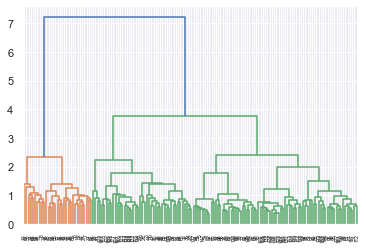

In [317]:
# original clustering algorithms
dendDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, get_leaves=True)

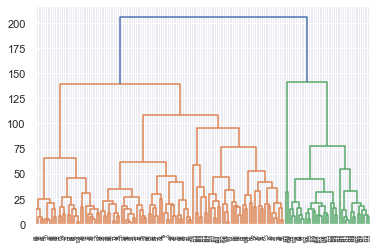

In [318]:
# Average distance
linkage_average = scipy.cluster.hierarchy.linkage(linkage_matrix, method='average', metric='euclidean', optimal_ordering=False)
dendDat = scipy.cluster.hierarchy.dendrogram(linkage_average, get_leaves=True, distance_sort = False)

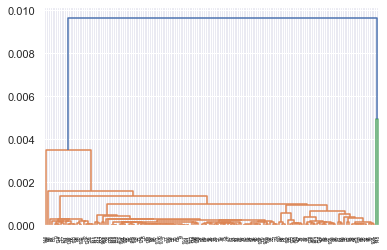

In [319]:
# correlation distance
linkage_correlation = scipy.cluster.hierarchy.linkage(linkage_matrix, method = 'single', metric='correlation', optimal_ordering=False)
dendDat = scipy.cluster.hierarchy.dendrogram(linkage_correlation, get_leaves=True, distance_sort = False)

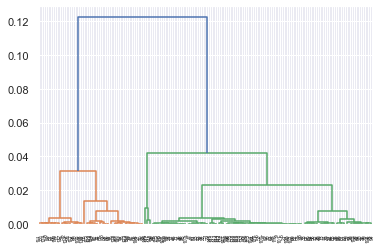

In [320]:
# cosine distance
linkage_cosine = scipy.cluster.hierarchy.linkage(linkage_matrix, method='average', metric='cosine', optimal_ordering=False)
dendDat = scipy.cluster.hierarchy.dendrogram(linkage_cosine, get_leaves=True, distance_sort = False)

We can find that the result euclidean, cosine, and correlation distance are very different. Because cosine and correlation are all from 0-1, and many distance are very similar (in this graph, from 0-0.05), the dendrogram becomes very dense and many clusters are compressed together.

## Topic Modeling

Because my key research question is the financial concerns, here I will only use corpus from Personal Finance subreddit

In [322]:
pf_df['tokenized_text'] = pf_df['text'].apply(lambda x: lucem_illud.word_tokenize(x))
pf_df['normalized_tokens'] = pf_df['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))
pf_df.head()

,title,text,url,created_utc,category,tokenized_text,normalized_tokens
0,"You are not ""family"" to your company. If you h...",People tend to feel a sense of guilt when it c...,https://www.reddit.com/r/personalfinance/comme...,1.583364e+09,personal finance,"[People, tend, to, feel, a, sense, of, guilt, ...","[people, tend, feel, sense, guilt, come, leave..."
1,"Warning: AT&T applying ""customer loyalty speed...",So over the holiday I received an email with a...,https://www.reddit.com/r/personalfinance/comme...,1.514842e+09,personal finance,"[So, over, the, holiday, I, received, an, emai...","[holiday, receive, email, order, confirmation,..."
2,If you’re ripped off by Comcast (or any intern...,Update 3: $3332 returned!\n\nUpdate 2: Holy mo...,https://www.reddit.com/r/personalfinance/comme...,1.522622e+09,personal finance,"[Update, 3, $, 3332, returned, Update, 2, Holy...","[update, $, return, update, holy, moly, $, ret..."
3,U.S. Breaks Up Fake I.R.S. Phone Scam Operatio...,[Some good news](https://www.nytimes.com/2018/...,https://www.reddit.com/r/personalfinance/comme...,1.532374e+09,personal finance,"[Some, good, news](https://www.nytimes.com/201...","[good, news](https://www.nytimes.com/2018/07/2..."
4,I made a spreadsheet for people who don't know...,Hey guys! last year I made a spreadsheet to he...,https://www.reddit.com/r/personalfinance/comme...,1.557934e+09,personal finance,"[Hey, guys, last, year, I, made, a, spreadshee...","[hey, guy, year, spreadsheet, help, budget-, b..."


In [323]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]
pf_df['reduced_tokens'] = pf_df['normalized_tokens'].apply(lambda x: dropMissing(x, TFVectorizer.vocabulary_.keys()))

In [324]:
dictionary = gensim.corpora.Dictionary(pf_df['reduced_tokens'])
corpus = [dictionary.doc2bow(text) for text in pf_df['reduced_tokens']]

In [366]:
gensim.corpora.MmCorpus.serialize('model//personalfinance.mm', corpus)
pfmm = gensim.corpora.MmCorpus('model//personalfinance.mm')

In [325]:
pflda = gensim.models.ldamodel.LdaModel(corpus=pfmm, id2word=dictionary, num_topics=10, alpha='auto', eta='auto')

We can inspect the degree to which distinct texts load on different topics. Here is one of the texts from the training set:

In [326]:
pf1Bow = dictionary.doc2bow(pf_df['reduced_tokens'][0])
pf1lda = pflda[pf1Bow]
print("The topics of the text: {}".format(pf_df['title'][0]))
print("are: {}".format(pf1lda))

The topics of the text: You are not "family" to your company. If you have an opportunity to better yourself, take it. They will do the same when it comes to cutting ties with you.
are: [(2, 0.96001345)]


In [327]:
ldaDF = pandas.DataFrame({
        'title' :pf_df['title'],
        'topics' : [pflda[dictionary.doc2bow(l)] for l in pf_df['reduced_tokens']]
    })

In [329]:
# Make each topic its own column

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(pflda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(pflda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

ldaDF[1::10]

,title,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
1,"Warning: AT&T applying ""customer loyalty speed...","[(0, 0.05989391), (5, 0.078119695), (6, 0.3562...",0.059894,0.000000,0.000000,0.000000,0.000000,0.078120,0.356273,0.488654,0.000000,0.014648
11,I mde a spreadsheet for people who dont know h...,"[(1, 0.20913208), (8, 0.09204436), (9, 0.69457...",0.000000,0.209132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.092044,0.694573
21,"Please, for the sake of your wallet, meal prep.","[(2, 0.36359403), (7, 0.62679464)]",0.000000,0.000000,0.363594,0.000000,0.000000,0.000000,0.000000,0.626795,0.000000,0.000000
31,Your amazon store card is probably scamming you,"[(6, 0.7875626), (8, 0.19379805)]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.787563,0.000000,0.193798,0.000000
41,"Seriously, get and use a credit card","[(8, 0.14082983), (9, 0.85631186)]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140830,0.856312
...,...,...,...,...,...,...,...,...,...,...,...,...
931,Just found out my exbf opened a credit card in...,"[(0, 0.30110615), (6, 0.52820146), (7, 0.08191...",0.301106,0.000000,0.000000,0.000000,0.000000,0.000000,0.528201,0.081915,0.000000,0.084445
941,"This guy with my first name, last name, and DO...","[(0, 0.14015494), (5, 0.47129112), (7, 0.38545...",0.140155,0.000000,0.000000,0.000000,0.000000,0.471291,0.000000,0.385452,0.000000,0.000000
951,A Small Personal Victory Against Debt Collection,"[(7, 0.9827915)]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.982791,0.000000,0.000000
961,I just became financially stable this year at ...,"[(0, 0.8704066), (1, 0.015329442), (2, 0.01492...",0.870407,0.015329,0.014925,0.012504,0.012598,0.015892,0.015094,0.016096,0.012621,0.014534


Now let's visualize this for several (e.g., 10) documents in the corpus. First we'll subset the data:

In [330]:
ldaDFV = ldaDF[:10][['topic_%d' %x for x in range(10)]]
ldaDFVisN = ldaDF[:10][['title']]
ldaDFVis = ldaDFV.to_numpy()
ldaDFVisNames = ldaDFVisN.to_numpy()
ldaDFV

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.000000,0.000000,0.960013,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.059894,0.000000,0.000000,0.0,0.000000,0.078120,0.356273,0.488654,0.000000,0.014648
2,0.274832,0.000000,0.089575,0.0,0.000000,0.628986,0.000000,0.000000,0.000000,0.000000
3,0.987866,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.029787,0.000000,0.0,0.075200,0.000000,0.000000,0.000000,0.000000,0.891341
5,0.000000,0.072056,0.377095,0.0,0.000000,0.000000,0.000000,0.543671,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.974476,0.000000,0.000000,0.000000
7,0.826003,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.138309,0.000000
8,0.000000,0.000000,0.956213,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.0,0.124034,0.505261,0.116036,0.240243,0.000000,0.000000


First we can visualize as a stacked bar chart:


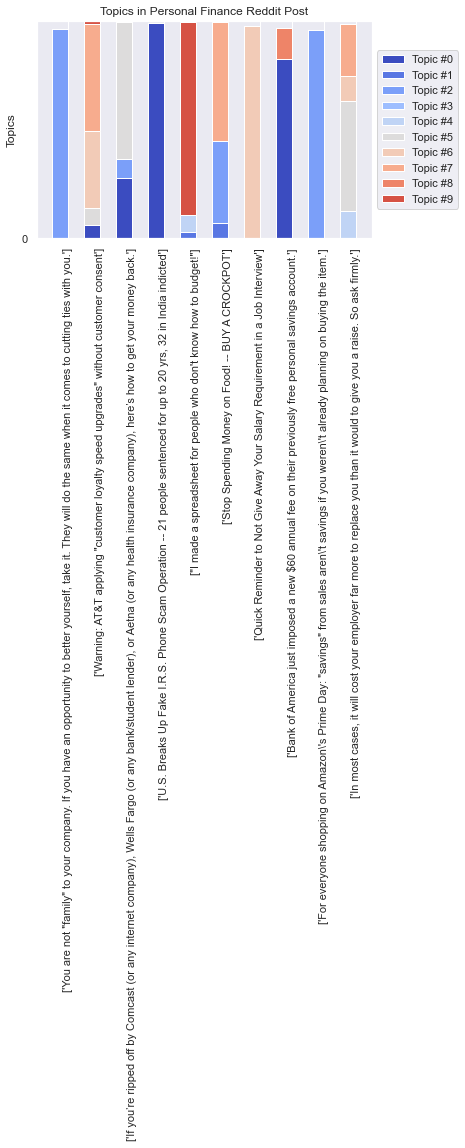

In [332]:
N = 10
ind = np.arange(N)
K = pflda.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Personal Finance Reddit Post')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

Visualize it as a heat map:


<ipython-input-333-6aea57f70a71>:12: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(cmap='Blues')
<ipython-input-333-6aea57f70a71>:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()  # fixes margins


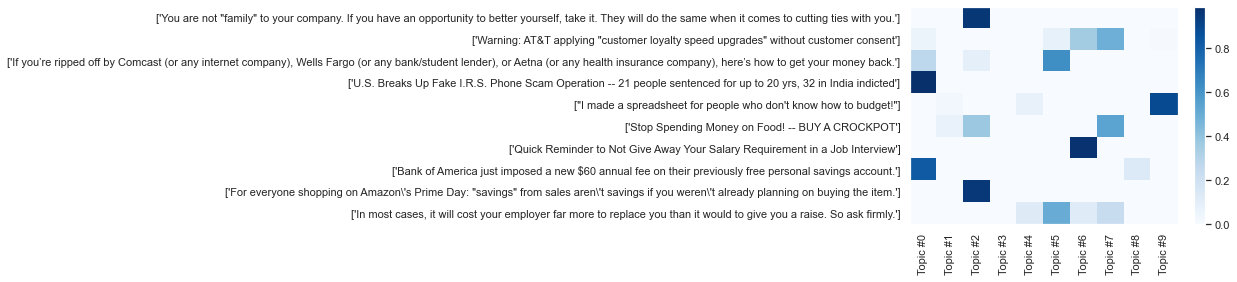

In [333]:
plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

Look at the top words in each topic:

In [335]:
topicsDict = {}
for topicNum in range(pflda.num_topics):
    topicWords = [w for w, p in pflda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,credit,year,money,pay,pay,pay,work,pay,account,credit
1,pay,loan,pay,car,year,work,account,month,card,pay
2,account,know,need,tell,car,year,year,account,money,card
3,edit,work,edit,ask,money,time,pay,day,credit,year
4,know,time,year,work,work,job,time,know,pay,like
5,year,pay,bank,say,cost,company,card,time,bank,money
6,loan,want,car,time,say,think,tell,people,finance,account
7,bank,month,like,money,need,money,try,edit,year,want
8,job,money,work,year,payment,say,thank,money,spend,time
9,money,payment,say,month,income,thank,say,loan,time,month


We can see that several of the topics have the same top words, such as pay, loan, month, pay, etc but there are definitely differences.

Now we can try and make the topics more distinct by changing the $\alpha$ and $\eta$ parameters of the model. $\alpha$ controls the sparsity of document-topic loadings, and $\eta$ controls the sparsity of topic-word loadings.

We can make a visualization of the distribution of words over any single topic.

<Figure size 432x288 with 0 Axes>

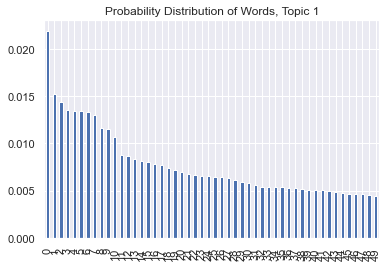

In [336]:
topic1_df = pandas.DataFrame(pflda.show_topic(1, topn=50))
plt.figure()
topic1_df.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1')
plt.show();

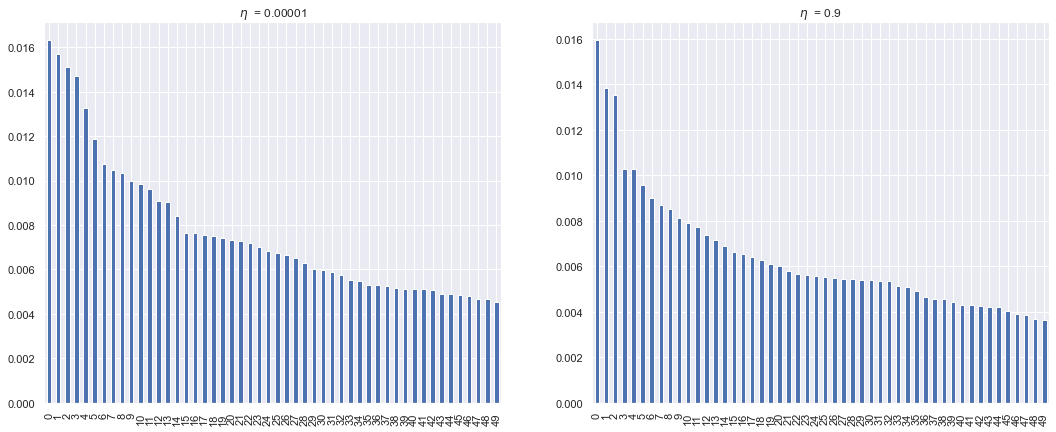

In [337]:
# change eta
pflda1 = gensim.models.ldamodel.LdaModel(corpus=pfmm, id2word=dictionary, num_topics=10, eta = 0.00001)
pflda2 = gensim.models.ldamodel.LdaModel(corpus=pfmm, id2word=dictionary, num_topics=10, eta = 0.9)

topic11_df = pandas.DataFrame(pflda1.show_topic(1, topn=50))
topic21_df = pandas.DataFrame(pflda2.show_topic(1, topn=50))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
topic11_df.plot.bar(legend = False, ax = ax1, title = '$\eta$  = 0.00001')
topic21_df.plot.bar(legend = False, ax = ax2, title = '$\eta$  = 0.9')
plt.show()

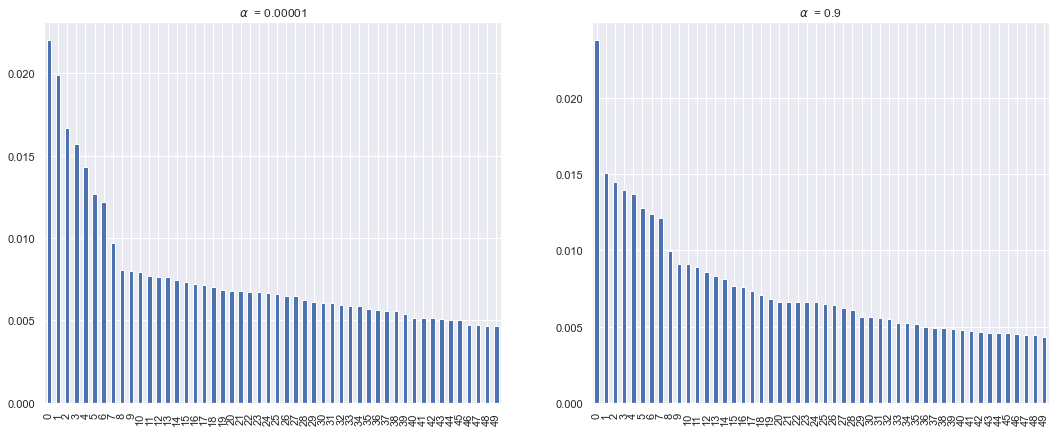

In [338]:
# change alpha
pflda3 = gensim.models.ldamodel.LdaModel(corpus=pfmm, id2word=dictionary, num_topics=10, alpha = 0.00001)
pflda4 = gensim.models.ldamodel.LdaModel(corpus=pfmm, id2word=dictionary, num_topics=10, alpha = 0.9)

topic31_df = pandas.DataFrame(pflda3.show_topic(1, topn=50))
topic41_df = pandas.DataFrame(pflda4.show_topic(1, topn=50))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

topic31_df.plot.bar(legend = False, ax = ax1, title = '$\\alpha$  = 0.00001')
topic41_df.plot.bar(legend = False, ax = ax2, title = '$\\alpha$  = 0.9')
plt.show()

$\alpha$ controls the sparsity of document-topic loadings, which means if one document is made of one topic or more. $\eta$ controls the sparsity of topic-word loadings, which measures if one topic is represented by a small amount of words or a variety of words. We can find that $\eta$ changes the topic a lot, while $\alpha$ doesn't change the graph much. The reason could be that my topics have some cross-over and some of them have similar contents. So when we increase $\eta$, the probability of different words becomes similar, but when we increase $\alpha$, it doesn't change much.

## Dynamic Topic Modeling

In [357]:
from gensim.models import ldaseqmodel

In [343]:
pf_2015 = pd.read_csv('data//pf_2015.csv').dropna()
pf_2016 = pd.read_csv('data//pf_2016.csv').dropna()
pf_2017 = pd.read_csv('data//pf_2017.csv').dropna()
pf_2018 = pd.read_csv('data//pf_2018.csv').dropna()
pf_2019 = pd.read_csv('data//pf_2019.csv').dropna()
pf_2021 = pd.read_csv('data//pf_top.csv').dropna()[:500]

In [350]:
year = ['2015','2016','2017','2018', '2019','2021']
posts_per_year = [len(pf_2015),len(pf_2016), len(pf_2017), len(pf_2018),len(pf_2019),len(pf_2021)]
pd.DataFrame(list(zip(year, posts_per_year)), columns =['Year', 'length'])

,Year,length
0,2015,498
1,2016,496
2,2017,500
3,2018,493
4,2019,496
5,2021,500


In [351]:
pf_2015.iloc[0,1]

"I've read a lot about how over a long period of time, the S&amp;P 500 index fund will average about 7-8% increase per year. Why wouldn't I just invest in this index fund instead of the 2050 retirement fund and average 4-5% over 40 years? There will be ups and downs for both funds but in the long term, the S&amp;P 500 index will give me more money....am I missing something?"

In [353]:
pf_2015_lst = []
pf_2016_lst = []
pf_2017_lst = []
pf_2018_lst = []
pf_2019_lst = []
pf_2021_lst = []
for i in range(493):
    pf_2015_lst.append(lucem_illud.normalizeTokens(pf_2015.iloc[i,1]))
    pf_2016_lst.append(lucem_illud.normalizeTokens(pf_2016.iloc[i,1]))
    pf_2017_lst.append(lucem_illud.normalizeTokens(pf_2017.iloc[i,1]))
    pf_2018_lst.append(lucem_illud.normalizeTokens(pf_2018.iloc[i,1]))
    pf_2019_lst.append(lucem_illud.normalizeTokens(pf_2019.iloc[i,1]))
    pf_2021_lst.append(lucem_illud.normalizeTokens(pf_2021.iloc[i,1]))

In [355]:
pf_final_corpus = pf_2015_lst + pf_2016_lst + pf_2017_lst + pf_2018_lst + pf_2019_lst + pf_2021_lst

In [356]:
pf_dictionary = gensim.corpora.Dictionary(pf_final_corpus)
pf_corpus = [pf_dictionary.doc2bow(text) for text in pf_final_corpus]


In [365]:
gensim.corpora.MmCorpus.serialize('model//pf_dynamic_topic.mm', pf_corpus)
pf_mmcorpus = gensim.corpora.MmCorpus('model//pf_dynamic_topic.mm')

In [358]:
pf_ldaseq = ldaseqmodel.LdaSeqModel(corpus=pf_corpus, id2word=pf_dictionary, 
                                    time_slice=posts_per_year, num_topics=5)

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\gensim\models\ldaseqmodel.py:1474: RuntimeWarning: invalid value encountered in double_scalars
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\gensim\models\ldaseqmodel.py:293: RuntimeWarning: divide by zero encountered in double_scalars
  convergence = np.fabs((bound - old_bound) / old_bound)
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\gensim\models\ldaseqmodel.py:1474: RuntimeWarning: invalid value encountered in double_scalars
  converged = np.fabs((lhood_old - lhood) / (lhood_old * total))
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-p

In [359]:
pf_ldaseq.print_topics(time=0)[0]

[('=', 0.025680467254753002),
 ('job', 0.019152790390026434),
 ('people', 0.015408986975855856),
 ('work', 0.014076594896198828),
 ('time', 0.01341866807200165),
 ('ask', 0.01109694685876903),
 ('company', 0.010807386015177303),
 ('like', 0.010083623444988758),
 ('offer', 0.009002699309158486),
 ('know', 0.008260881881067491),
 ('personalfinance', 0.006922802331907571),
 ('feel', 0.006375261668609462),
 ('day', 0.006366571955316396),
 ('think', 0.006323694037776664),
 ('thing', 0.00627812960210423),
 ('post', 0.006150079009326055),
 ('employee', 0.005926394201258255),
 ('need', 0.00588798831003651),
 ('look', 0.00557896332513692),
 ('financial', 0.005542896506231434)]

In [360]:
pf_ldaseq.print_topics(time=5)[0]

[('job', 0.02326820622681811),
 ('=', 0.016191862403229975),
 ('people', 0.01482229729909193),
 ('time', 0.014422142511224994),
 ('work', 0.013232981652408302),
 ('ask', 0.011721762589850217),
 ('offer', 0.010530067364713255),
 ('company', 0.009907280676487825),
 ('like', 0.009746858543194315),
 ('know', 0.008360087345015784),
 ('feel', 0.007091622501030765),
 ('employee', 0.006556959801791031),
 ('day', 0.006497343433958443),
 ('think', 0.006469605432618019),
 ('salary', 0.006046092575489292),
 ('|', 0.00601471988220783),
 ('thing', 0.005972722107721365),
 ('budget', 0.005930092982396047),
 ('look', 0.005926002373713439),
 ('need', 0.005904469566744137)]

In [361]:
top_words_topic_0 = {}
for i, year in enumerate([2015, 2016, 2017, 2018, 2019, 2021]):
    word_lst = pf_ldaseq.print_topics(time=i)[0]
    top_words_topic_0[year] = [word for word, prob in word_lst[:10]]

In [362]:
pd.DataFrame(top_words_topic_0)

,2015,2016,2017,2018,2019,2021
0,=,=,job,job,job,job
1,job,job,=,=,=,=
2,people,people,people,people,people,people
3,work,work,work,time,time,time
4,time,time,time,work,work,work
5,ask,ask,ask,ask,ask,ask
6,company,company,company,like,offer,offer
7,like,like,like,company,like,company
8,offer,offer,offer,offer,company,like
9,know,know,know,know,know,know


In [535]:
top_words_topic_1 = {}
for i, year in enumerate([2015, 2016, 2017, 2018, 2019, 2021]):
    word_lst = pf_ldaseq.print_topics(time=i)[1]
    top_words_topic_1[year] = [word for word, prob in word_lst[:10]]
pd.DataFrame(top_words_topic_1)

,2015,2016,2017,2018,2019,2021
0,$,$,$,$,$,$
1,pay,pay,pay,pay,pay,pay
2,loan,loan,loan,loan,loan,car
3,year,year,year,year,car,year
4,month,month,month,month,year,loan
5,car,car,car,car,month,month
6,debt,debt,debt,debt,debt,debt
7,payment,payment,payment,payment,work,work
8,work,work,work,work,payment,payment
9,house,live,live,live,get,get


In [536]:
top_words_topic_2 = {}
for i, year in enumerate([2015, 2016, 2017, 2018, 2019, 2021]):
    word_lst = pf_ldaseq.print_topics(time=i)[2]
    top_words_topic_2[year] = [word for word, prob in word_lst[:10]]
pd.DataFrame(top_words_topic_2)

,2015,2016,2017,2018,2019,2021
0,delete,delete,delete,delete,delete,delete
1,fund,fund,fund,remove,remove,remove
2,remove,remove,remove,fund,fund,fund
3,stock,stock,stock,stock,stock,stock
4,sell,sell,sell,sell,sell,sell
5,buy,buy,buy,buy,buy,buy
6,market,market,market,market,market,market
7,share,share,share,share,vanguard,vanguard
8,vanguard,vanguard,vanguard,vanguard,share,share
9,portfolio,portfolio,portfolio,portfolio,portfolio,portfolio


In [537]:
top_words_topic_3 = {}
for i, year in enumerate([2015, 2016, 2017, 2018, 2019, 2021]):
    word_lst = pf_ldaseq.print_topics(time=i)[3]
    top_words_topic_3[year] = [word for word, prob in word_lst[:10]]
pd.DataFrame(top_words_topic_3)

,2015,2016,2017,2018,2019,2021
0,$,$,$,$,$,$
1,year,year,year,year,year,year
2,money,money,account,account,account,account
3,account,account,money,money,money,money
4,tax,tax,tax,tax,tax,tax
5,saving,saving,saving,ira,ira,saving
6,401k,ira,ira,401k,401k,401k
7,income,401k,401k,saving,saving,ira
8,ira,income,income,invest,invest,invest
9,invest,invest,invest,roth,roth,roth


In [538]:
top_words_topic_4 = {}
for i, year in enumerate([2015, 2016, 2017, 2018, 2019, 2021]):
    word_lst = pf_ldaseq.print_topics(time=i)[4]
    top_words_topic_4[year] = [word for word, prob in word_lst[:10]]
pd.DataFrame(top_words_topic_4)

,2015,2016,2017,2018,2019,2021
0,credit,credit,credit,credit,credit,credit
1,card,card,card,card,card,card
2,account,account,account,account,account,account
3,bank,bank,bank,bank,bank,bank
4,pay,pay,pay,check,check,check
5,get,check,check,pay,$,$
6,check,get,get,get,get,get
7,say,say,say,$,pay,pay
8,$,score,$,say,score,score
9,score,$,score,score,say,say


In [364]:
pf_ldaseq.save("model//pf_ldaseqmodel")

# Vector Space and Word Embeddings

This part, we build on last part's topic modeling techniques by taking a text corpus we have developed, specifying an underlying number of dimensions, and training a model with a neural network auto-encoder (one of Google's word2vec algorithms) that best describes corpus words in their local linguistic contexts, and exploring their locations in the resulting space to learn about the discursive culture that produced them. Documents here are represented as densely indexed locations in dimensions, rather than sparse mixtures of topics (as in LDA topic modeling), so that distances between those documents (and words) are consistently superior, though they require the full vector of dimension loadings (rather than just a few selected topic loadings) to describe. We will explore these spaces to understand complex, semantic relationships between words, index documents with descriptive words, identify the likelihood that a given document would have been produced by a given vector model, and explore how semantic categories can help us understand the cultures that produced them.

In [367]:
#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

import numpy as np #For arrays
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

In [369]:
#Apply our functions, notice each row is a list of lists now
pf_df['tokenized_sents'] = pf_df['text'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
#senReleasesDF['normalized_sents'] = senReleasesDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s, lemma=False) for s in x])
pf_df['normalized_sents'] = pf_df['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

pf_df[:100:10]

,title,text,url,created_utc,category,tokenized_text,normalized_tokens,reduced_tokens,tokenized_sents,normalized_sents
0,"You are not ""family"" to your company. If you h...",People tend to feel a sense of guilt when it c...,https://www.reddit.com/r/personalfinance/comme...,1.583364e+09,personal finance,"[People, tend, to, feel, a, sense, of, guilt, ...","[people, tend, feel, sense, guilt, come, leave...","[people, feel, sense, come, leave, job, like, ...","[[People, tend, to, feel, a, sense, of, guilt,...","[[people, tend, feel, sense, guilt, come, leav..."
10,IRS will allow employers to match their employ...,https://www.marketwatch.com/story/irs-ruling-a...,https://www.reddit.com/r/personalfinance/comme...,1.535464e+09,personal finance,[https://www.marketwatch.com/story/irs-ruling-...,[https://www.marketwatch.com/story/irs-ruling-...,"[irs, set, company, match, employee, student, ...",[[https://www.marketwatch.com/story/irs-ruling...,[[https://www.marketwatch.com/story/irs-ruling...
20,If you can't get your emergency fund to grow b...,Over the summer I made a steadfast commitment ...,https://www.reddit.com/r/personalfinance/comme...,1.539013e+09,personal finance,"[Over, the, summer, I, made, a, steadfast, com...","[summer, steadfast, commitment, get, month, em...","[month, emergency, fund, build, save, month, e...","[[Over, the, summer, I, made, a, steadfast, co...","[[summer, steadfast, commitment, get, month, e..."
30,My Dad just figured out he's been paying $30/m...,The bill was being autopaid on his credit card...,https://www.reddit.com/r/personalfinance/comme...,1.485125e+09,personal finance,"[The, bill, was, being, autopaid, on, his, cre...","[bill, autopaid, credit, card, think, aware, p...","[credit, card, think, aware, pay, sure, know, ...","[[The, bill, was, being, autopaid, on, his, cr...","[[bill, autopaid, credit, card], [think, aware..."
40,My boss game me a $100 “Christmas bonus” and t...,What? What if anything do I do about this? Hon...,https://www.reddit.com/r/personalfinance/comme...,1.516437e+09,personal finance,"[What, What, if, anything, do, I, do, about, t...","[honestly, have, money, stay, check, frivolous...","[honestly, money, stay, check, spend, dollar, ...","[[What], [What, if, anything, do, I, do, about...","[[], [], [honestly, have, money, stay, check, ..."
50,My credit union offered me an appointment with...,I'm extremely annoyed. I feel that I've been s...,https://www.reddit.com/r/personalfinance/comme...,1.518737e+09,personal finance,"[I, 'm, extremely, annoyed, I, feel, that, I, ...","[be, extremely, annoy, feel, have, subject, ba...","[extremely, feel, set, say, say, yes, say, gre...","[[I, 'm, extremely, annoyed], [I, feel, that, ...","[[be, extremely, annoy], [feel, have, subject,..."
60,Wife had a stroke. Need to protect family and ...,My wife (38) had a stroke that left her with n...,https://www.reddit.com/r/personalfinance/comme...,1.513868e+09,personal finance,"[My, wife, 38, had, a, stroke, that, left, her...","[wife, stroke, leave, motor, function, require...","[wife, leave, care, rest, life, little, need, ...","[[My, wife, 38, had, a, stroke, that, left, he...","[[wife, stroke, leave, motor, function], [requ..."
70,How to determine if you can really afford that...,I keep seeing posts where people are strugglin...,https://www.reddit.com/r/personalfinance/comme...,1.503938e+09,personal finance,"[I, keep, seeing, posts, where, people, are, s...","[see, post, people, struggle, budget, ridiculo...","[post, people, budget, car, payment, let, litt...","[[I, keep, seeing, posts, where, people, are, ...","[[see, post, people, struggle, budget, ridicul..."
80,Sell the things that aren't bringing value to ...,It also makes you feel good knowing that the i...,https://www.reddit.com/r/personalfinance/comme...,1.543234e+09,personal finance,"[It, also, makes, you, feel, good, knowing, th...","[make, feel, good, know, item, bring, value, l...","[make, feel, good, know, bring, value, life, i...","[[I

## CBOW(The Continuous Bag of Words) Model

Word2Vec needs to retain the sentence structure so as to capture a "continuous bag of words (CBOW)" and all of the skip-grams within a word window. The algorithm tries to preserve the distances induced by one of these two local structures. This is very different from clustering and LDA topic modeling which extract unordered words alone.

When we normalize here, we don't use the lematized form of the word because we might lose information. Note the paramter in the normalize tokens function.


In [370]:
pf_W2V = gensim.models.word2vec.Word2Vec(pf_df['normalized_sents'].sum())

In [420]:
# save the model for later use
pf_W2V.save("model//pf_W2V_CBOW")

In [371]:
numWords = 50
targetWords = pf_W2V.wv.index2word[:numWords]

wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(pf_W2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)

# use PCA to reduce the dimensions to 50
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

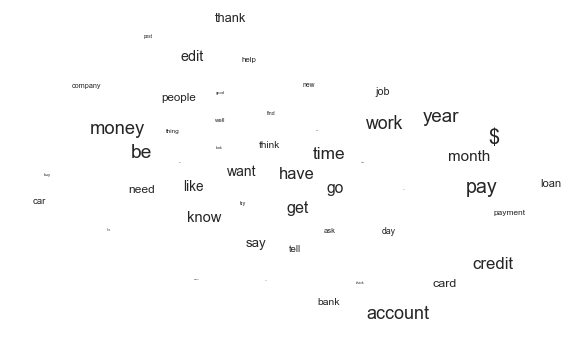

In [392]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.savefig('image/pf_cbow_viz.png', dpi=300)
plt.show()

In [379]:
pf_W2V.most_similar('finance')

[('domain', 0.9975020885467529),
 ('core', 0.9973710775375366),
 ('economics', 0.9970412850379944),
 ('introduction', 0.9942911863327026),
 ('tutorial', 0.9941723942756653),
 ('inflation', 0.9931447505950928),
 ('investment', 0.9930504560470581),
 ('v', 0.9929893016815186),
 ('personal', 0.9928480386734009),
 ('gain', 0.9927452206611633)]

In [380]:
pf_W2V.most_similar('tax')

[('income', 0.9929949045181274),
 ('taxis', 0.9916219711303711),
 ('file', 0.9864275455474854),
 ('return', 0.984421968460083),
 ('=', 0.9806637763977051),
 ('penalty', 0.9805638790130615),
 ('federal', 0.9803458452224731),
 ('owe', 0.9785853624343872),
 ('high', 0.9780884385108948),
 ('retirement', 0.9776865243911743)]

In [381]:
pf_W2V.most_similar('student')

[('interest', 0.9909781813621521),
 ('payment', 0.9859322309494019),
 ('debt', 0.984935462474823),
 ('pay', 0.983666181564331),
 ('loan', 0.982388973236084),
 ('rate', 0.9822604656219482),
 ('monthly', 0.9767628908157349),
 ('car', 0.9761530160903931),
 ('year', 0.9756983518600464),
 ('bill', 0.9754066467285156)]

In [382]:
pf_W2V.doesnt_match(['student', 'loan', 'debt', 'payment', 'account','investment', 'tax'])

'investment'

In [383]:
pf_W2V.most_similar(positive=['pay', 'debt'], negative=['loan'])

[('payment', 0.9819113612174988),
 ('balance', 0.9798222780227661),
 ('saving', 0.9790351986885071),
 ('bill', 0.9766278266906738),
 ('interest', 0.9738701581954956),
 ('charge', 0.9734823107719421),
 ('score', 0.9733520150184631),
 ('fee', 0.9727603793144226),
 ('debit', 0.971894383430481),
 ('use', 0.9694059491157532)]

In [384]:
pf_W2V.most_similar(positive=['student', 'loan'], negative=['pay'])

[('interest', 0.9743262529373169),
 ('payment', 0.9645017981529236),
 ('debt', 0.9612845182418823),
 ('rate', 0.9586682319641113),
 ('car', 0.9535707235336304),
 ('year', 0.9515305757522583),
 ('monthly', 0.9501677751541138),
 ('month', 0.9499293565750122),
 ('mortgage', 0.9476354122161865),
 ('high', 0.9457377195358276)]

In [385]:
pf_W2V.most_similar(positive=['student', 'loan'], negative=['pay'])

[('interest', 0.9743262529373169),
 ('payment', 0.9645017981529236),
 ('debt', 0.9612845182418823),
 ('rate', 0.9586682319641113),
 ('car', 0.9535707235336304),
 ('year', 0.9515305757522583),
 ('monthly', 0.9501677751541138),
 ('month', 0.9499293565750122),
 ('mortgage', 0.9476354122161865),
 ('high', 0.9457377195358276)]

In [386]:
pf_W2V.most_similar(positive=['credit', 'score'], negative=['account'])

[('card', 0.9588435888290405),
 ('debt', 0.9354524612426758),
 ('report', 0.9336528182029724),
 ('debit', 0.9315100908279419),
 ('freeze', 0.9170413613319397),
 ('use', 0.9125615954399109),
 ('balance', 0.9112440347671509),
 ('bank', 0.9102973937988281),
 ('payment', 0.9060723185539246),
 ('check', 0.9037680625915527)]

In [388]:
pf_W2V.most_similar(positive=['mortgage', 'house'], negative=['car'])

[('feed', 0.9989472031593323),
 ('reduce', 0.99884432554245),
 ('estimate', 0.9988415241241455),
 ('count', 0.9988387823104858),
 ('government', 0.9988315105438232),
 ('normal', 0.9987907409667969),
 ('vary', 0.9987877607345581),
 ('borrower', 0.9987853169441223),
 ('unpaid', 0.9987794160842896),
 ('eligible', 0.9987743496894836)]

In [389]:
pf_W2V.most_similar(positive=['car', 'insurance'], negative=['house'])

[('rate', 0.9907059073448181),
 ('year', 0.9906378984451294),
 ('monthly', 0.9896749258041382),
 ('total', 0.9883881211280823),
 ('high', 0.9882537126541138),
 ('bill', 0.9882220029830933),
 ('mortgage', 0.9881570339202881),
 ('fee', 0.9877430200576782),
 ('rend', 0.9872153997421265),
 ('cost', 0.9862707257270813)]

**What does this pattern reveal about the semantic organization of words in your corpora?**

We can find that the most different word in ['student', 'loan', 'debt', 'payment', 'account','investment', 'tax'] is 'investment'. Probabaly it's because investment is an action for people have extra money and relatively more affluent, but other words such as 'loan' 'debt' 'payment' are more for people who have more financial limitations.

For addition/subtraction, we got following relationships:

'pay' + 'debt' = 'loan' + 'payment'

'student' + 'loan' = 'pay' + '$'

'credit' + 'score' = 'account' + 'start'

'mortgage' + 'house' = 'lose' + 'refinance'

**Which estimation and visualization specification generate the most insight and appear the most robustly supported and why?**

I repeat the visualization several times (because the plot is kind of nondeterministic). Among them, 'payment', 'pay', 'credit', 'loan' are usually together. 'house' and 'mortgage' are side by side, as well as 'tax' and 'income'

## Skip-gram model

In [390]:
pf_W2V_sg = gensim.models.word2vec.Word2Vec(pf_df['normalized_sents'].sum(), sg=1, window=10)
# save the model for later use
pf_W2V_sg.save("model//pf_W2V_sg")

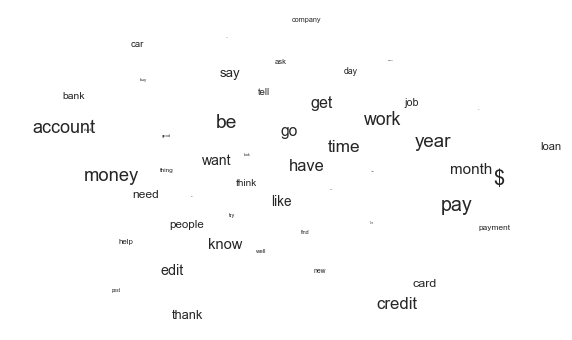

In [396]:
numWords = 50
targetWords = pf_W2V_sg.wv.index2word[:numWords]

wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(pf_W2V_sg[word])
wordsSubMatrix = np.array(wordsSubMatrix)

# use PCA to reduce the dimensions to 50
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.savefig('image\pf_sg_viz2.png', dpi=300)
plt.show()

In [399]:
pf_W2V_sg.most_similar('finance')

[('domain', 0.9038022756576538),
 ('core', 0.8971995711326599),
 ('economics', 0.8908737897872925),
 ('tutorial', 0.8825550079345703),
 ('personal', 0.8703951835632324),
 ('v', 0.8317123651504517),
 ('introduction', 0.8269104957580566),
 ('investment', 0.8173561096191406),
 ('vehicle', 0.8171368837356567),
 ('inflation', 0.8123129606246948)]

In [402]:
compare_finance = pd.DataFrame(list(zip(pf_W2V.most_similar('finance'),pf_W2V_sg.most_similar('finance'))),columns = ['CBOW','SG'])
compare_finance

,CBOW,SG
0,"(domain, 0.9975020885467529)","(domain, 0.9038022756576538)"
1,"(core, 0.9973710775375366)","(core, 0.8971995711326599)"
2,"(economics, 0.9970412850379944)","(economics, 0.8908737897872925)"
3,"(introduction, 0.9942911863327026)","(tutorial, 0.8825550079345703)"
4,"(tutorial, 0.9941723942756653)","(personal, 0.8703951835632324)"
5,"(inflation, 0.9931447505950928)","(v, 0.8317123651504517)"
6,"(investment, 0.9930504560470581)","(introduction, 0.8269104957580566)"
7,"(v, 0.9929893016815186)","(investment, 0.8173561096191406)"
8,"(personal, 0.9928480386734009)","(vehicle, 0.8171368837356567)"
9,"(gain, 0.9927452206611633)","(inflation, 0.8123129606246948)"


In [400]:
pf_W2V_sg.most_similar('loan')

[('student', 0.947920560836792),
 ('forgiveness', 0.9250237345695496),
 ('program', 0.9044044613838196),
 ('borrower', 0.8913569450378418),
 ('qualify', 0.8813320398330688),
 ('graduate', 0.8758156299591064),
 ('forgive', 0.8746172189712524),
 ('consolidate', 0.8732489347457886),
 ('repay', 0.8646396398544312),
 ('discharge', 0.8627040982246399)]

In [403]:
compare_loan = pd.DataFrame(list(zip(pf_W2V.most_similar('loan'),pf_W2V_sg.most_similar('loan'))),columns = ['CBOW','SG'])
compare_loan

,CBOW,SG
0,"(pay, 0.9886571168899536)","(student, 0.947920560836792)"
1,"(interest, 0.986750602722168)","(forgiveness, 0.9250237345695496)"
2,"(payment, 0.9842690229415894)","(program, 0.9044044613838196)"
3,"(student, 0.982388973236084)","(borrower, 0.8913569450378418)"
4,"(month, 0.9769452810287476)","(qualify, 0.8813320398330688)"
5,"($, 0.9758726358413696)","(graduate, 0.8758156299591064)"
6,"(debt, 0.975852370262146)","(forgive, 0.8746172189712524)"
7,"(rate, 0.9507907629013062)","(consolidate, 0.8732489347457886)"
8,"(year, 0.9503719806671143)","(repay, 0.8646396398544312)"
9,"(car, 0.9470028281211853)","(discharge, 0.8627040982246399)"


In [404]:
compare_house = pd.DataFrame(list(zip(pf_W2V.most_similar('house'),pf_W2V_sg.most_similar('house'))),columns = ['CBOW','SG'])
compare_house

,CBOW,SG
0,"(home, 0.9981556534767151)","(cheap, 0.9140413999557495)"
1,"(make, 0.9973364472389221)","(home, 0.90831458568573)"
2,"(buy, 0.9973288774490356)","(own, 0.8955202102661133)"
3,"(expense, 0.9969913959503174)","(sell, 0.893168032169342)"
4,"(college, 0.9969626665115356)","(rent, 0.8855429887771606)"
5,"(old, 0.9969006180763245)","(buy, 0.8843915462493896)"
6,"(plan, 0.996694803237915)","(nice, 0.8827567100524902)"
7,"(school, 0.9964942336082458)","(clothe, 0.879166841506958)"
8,"(price, 0.9963560700416565)","(car, 0.8713674545288086)"
9,"(cost, 0.9963399171829224)","(reliable, 0.8700470924377441)"


In [405]:
compare_car = pd.DataFrame(list(zip(pf_W2V.most_similar('car'),pf_W2V_sg.most_similar('car'))),columns = ['CBOW','SG'])
compare_car

,CBOW,SG
0,"(year, 0.9965783357620239)","(buy, 0.8836973905563354)"
1,"(save, 0.9944934844970703)","(dealer, 0.8795164823532104)"
2,"(cost, 0.9936761856079102)","(lease, 0.8733770847320557)"
3,"(rend, 0.9935034513473511)","(house, 0.8713673949241638)"
4,"(monthly, 0.9915933609008789)","(cheap, 0.8631163835525513)"
5,"(high, 0.9915880560874939)","(dealership, 0.862861692905426)"
6,"(mortgage, 0.9912928342819214)","(sell, 0.8570137023925781)"
7,"(extra, 0.9912130832672119)","(nice, 0.8435002565383911)"
8,"(k, 0.9912066459655762)","(own, 0.8428412079811096)"
9,"(mo, 0.9906253814697266)","(price, 0.8366162180900574)"


In [406]:
pf_W2V_sg.doesnt_match(['student', 'loan', 'debt', 'payment', 'account','investment', 'tax'])

'tax'

In [407]:
pf_W2V_sg.most_similar(positive = ['car', 'insurance'], negative = ['house'])

[('coverage', 0.79103684425354),
 ('policy', 0.7390100955963135),
 ('company', 0.7027133703231812),
 ('health', 0.6932090520858765),
 ('cover', 0.6668670177459717),
 ('tow', 0.6571249961853027),
 ('contract', 0.6563519239425659),
 ('utility', 0.6468785405158997),
 ('rental', 0.6342697143554688),
 ('doctor', 0.630096435546875)]

What does this exploration reveal about the semantic structure of your corpus?

Like CBOW model, words 'payment', 'credit', 'pay' are together. 'tax' are together with 'year'. 'income' is next to 'need' 'month' and 'money'.


### Stretch: Explore different vector calculations such as multiplication, division

To do multiplication for vector, we can use `gensim.models.Word2Vec.most_similar_cosmul` method.

In [408]:
pf_W2V_sg.most_similar_cosmul(positive = ['car', 'insurance'], negative = ['house'])

[('coverage', 0.9512980580329895),
 ('policy', 0.9177299737930298),
 ('company', 0.9122030138969421),
 ('health', 0.8886746168136597),
 ('contract', 0.8747652173042297),
 ('tow', 0.8744335174560547),
 ('cover', 0.8731241226196289),
 ('utility', 0.8690546751022339),
 ('rental', 0.862145721912384),
 ('doctor', 0.8584774136543274)]

## Doc2Vec

Embed documents related to your final project using doc2vec

In [409]:
keywords = ['finance','loan','debt','house','car', 'retirement','tax', 'credit','debit','account','bank','investment','pay','payment']

In [413]:
#tokenize and normalize words
pf_df['tokenized_words'] = pf_df['text'].apply(lambda x: lucem_illud.word_tokenize(x))
pf_df['normalized_words'] = pf_df['text'].apply(lambda x: lucem_illud.normalizeTokens(x, lemma=False))

Attentions: We have different columns:

'tokenized_text',

'normalized_tokens', 

'reduced_tokens',

'tokenized_sents',

'normalized_sents', 

'tokenized_words',

'normalized_words'

In [415]:
pf_df.columns

Index(['title', 'text', 'url', 'created_utc', 'category', 'tokenized_text',
       'normalized_tokens', 'reduced_tokens', 'tokenized_sents',
       'normalized_sents', 'tokenized_words', 'normalized_words'],
      dtype='object')

In [414]:
#tokenize and normalize words
pf_df['tokenized_words'] = pf_df['text'].apply(lambda x: lucem_illud.word_tokenize(x))
pf_df['normalized_words'] = pf_df['text'].apply(lambda x: lucem_illud.normalizeTokens(x, lemma=False))

In [417]:
taggedDocs = []
for index, row in pf_df.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['normalized_words']]
    docKeywords.append(row['title'])
    taggedDocs.append(gensim.models.doc2vec.LabeledSentence(words = row['normalized_words'], tags = docKeywords))
pf_df['TaggedDocs'] = taggedDocs

In [418]:
pf_w2v_df = pf_df[['title', 'text', 'tokenized_words', 'normalized_words', 'TaggedDocs']]
pf_w2v_df.head(1)

,title,text,tokenized_words,normalized_words,TaggedDocs
0,"You are not ""family"" to your company. If you h...",People tend to feel a sense of guilt when it c...,"[People, tend, to, feel, a, sense, of, guilt, ...","[people, tend, feel, sense, guilt, comes, leav...","([people, tend, feel, sense, guilt, comes, lea..."


In [419]:
pf_D2V = gensim.models.doc2vec.Doc2Vec(pf_w2v_df['TaggedDocs'], vector_size = 100)

In [421]:
# save the model for later use
pf_D2V.save("model//pf_D2V")

### Explore the relationship between different documents and the word vectors

In [422]:
pf_D2V.docvecs.most_similar([pf_D2V['mom'] ], topn=10 )

[('A cautionary tale for young students and letting your parents handle your student loans',
  0.9990794658660889),
 ('Roommate spends all his time at SOs apartment.', 0.998318612575531),
 ('Saving Tip: Try to Have 2 $0 Spent Days Per Week', 0.9970574975013733),
 ('Disabled 29 y/o, heating bills out of control and rising. Not sure what to do.',
  0.9966570138931274),
 ("When heading into Black Friday sales, it's not a sale if you didn't plan to buy the item in the first place.",
  0.9964015483856201),
 ("I'm 19 my mother just passed away and im going to be homeless on the first and have no idea what to do",
  0.9964007139205933),
 ('My newborn son passed away after 2 days in hospital. Bill is $208,000.',
  0.9962618350982666),
 ("I took yous guy's advice and went to Craigslist and letgo for furniture",
  0.9961082935333252),
 ('Dash Cams', 0.9960380792617798),
 ('How my emergency fund made a horrible week a little more bearable.',
  0.9959719777107239)]

In [423]:
pf_D2V.docvecs.most_similar([pf_D2V['son'] ], topn=10 )

[("Just opened some mail to find that have had an outstanding balance from an ER visit last November where they didnt have my insurance on file even though it's the ER in the hospital I work at and have insurance through. Now it's been sent to a collection agency and im freaking out.",
  0.9985569715499878),
 ('Target physical gift card scam', 0.9983338713645935),
 ("If your bank calls you, even if the phone number is legit, don't verify ANYTHING, call them back first",
  0.9980137944221497),
 ("If you notice a charge on your debit card that you don't recognize for even a penny, take action.",
  0.9978358745574951),
 ("Expedia charged me $500 for a hotel, yet never paid the hotel, thus I was forced to pay the hotel directly. Now Expedia won't return my original $500. What action can I take?",
  0.9974841475486755),
 ('Chase forcing me to go to a branch to repay $.19 they accidentally gave me',
  0.9970941543579102),
 ('Fairly clever scam attempted on my grandparents yesterday',
  0.997

In [424]:
pf_D2V.docvecs.most_similar([pf_D2V['investment'] ], topn=10 )

[('Just a shoutout to the NY Times Rent Vs. Buy calculator. Really top notch.',
  0.9978821277618408),
 ('Charge-backed 24 Hr Fitness through my bank, they are contacting me trying to collect money',
  0.9956051707267761),
 ("My cost of insurance for next year is 1750% more even though I'm making significantly less, is this supposed to happen?",
  0.9953768253326416),
 ("Don't rent a modem from your ISP. Buy your own.", 0.9948508143424988),
 ('[OC] I tracked every dollar I spent over the last 8 yrs. You can too! (Spreadsheets/instructions for 2019 included)',
  0.9929335713386536),
 ('U.S. to Cut Rates on Student Loans for First Time in 3 Years',
  0.9928086400032043),
 ('Girlfriend diagnosed with Leukemia w/o insurance last year. Now in remission (Woo!)... but not without $100,000+ of medical debt.',
  0.9925582408905029),
 ('"Close to half of those who earn from $100,000 to $149,999 a year have less than $1,000 in their savings accounts." Great article from Bloomberg showing how prev

### Interrogate critical word vectors within your corpus in terms of the most similar words, analogies, and other additions and subtraction

In [425]:
pf_D2V.docvecs.most_similar([pf_D2V['finance']], topn =5)

[("Need a 2016 New Year's Resolution? Watch these.", 0.9866855144500732),
 ('Khan Academy has basic explanations on taxes in the U.S. This should help you with understanding tax brackets, deductions, and other related information.',
  0.9857137799263),
 ('Free tax filing software program offered to anyone making <$64k.',
  0.980594277381897),
 ('66% of people between age 21 and 32 have $0 saved in Employer-sponsored retirement plans',
  0.9772472381591797),
 ("My employer offers a 1:1 match on a 529 but I don't want to have kids. Should I take advantage of the match and pay the 10% fee on non-education disbursements?",
  0.972161054611206)]

In [426]:
pf_D2V.most_similar(positive = ['payment','debt'], negative = ['loan'], topn = 3)

[('collectors', 0.9700216054916382),
 ('payments', 0.9698970913887024),
 ('negatively', 0.9687555432319641)]

In [428]:
pf_D2V.most_similar(positive = ['credit','score'], negative = ['card'], topn = 3)

[('cards', 0.9915267825126648),
 ('karma', 0.9809198975563049),
 ('secured', 0.9761202335357666)]

In [429]:
pf_D2V.most_similar(positive = ['car','insurance'], negative = ['house'], topn = 3)

[('totaled', 0.979922890663147),
 ('rent', 0.9795087575912476),
 ('years', 0.9766436815261841)]

In [432]:
pf_D2V.most_similar(positive = ['job','income'], negative = ['tax'], topn = 3)

[('allison', 0.9646586179733276),
 ('wheel', 0.9641237258911133),
 ('continuing', 0.9549471139907837)]

In [427]:
pf_D2V.docvecs.most_similar(positive = ['payment','debt'], negative = ['loan'], topn = 3)

[('Near the limit on your Credit Card? If you can afford the minimum payment this month, make the same payment next month, NOT the new minimum payment.',
  0.9118282794952393),
 ('Your friendly reminder that credit score is not an indicator of overall financial health, nor should you pay interest just to bump your score',
  0.7592014074325562),
 ('My parents want to put their house in my name so they can take out on a loan on it. Is there any risk to this?',
  0.728163480758667)]

### Visualization

In [433]:
#Plot the keywords similarities
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = pf_D2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, pf_D2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

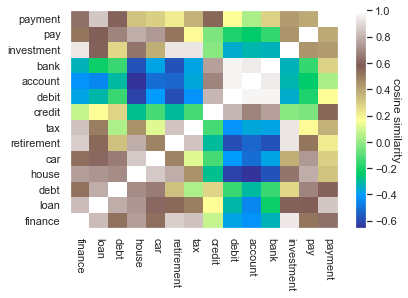

In [434]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

In [435]:
#Word similarities within decision
targetDocs = pf_w2v_df['title'][20:30]

heatmapMatrixC = []

for tagOuter in targetDocs:
    column = []
    tagVec = pf_D2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, pf_D2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

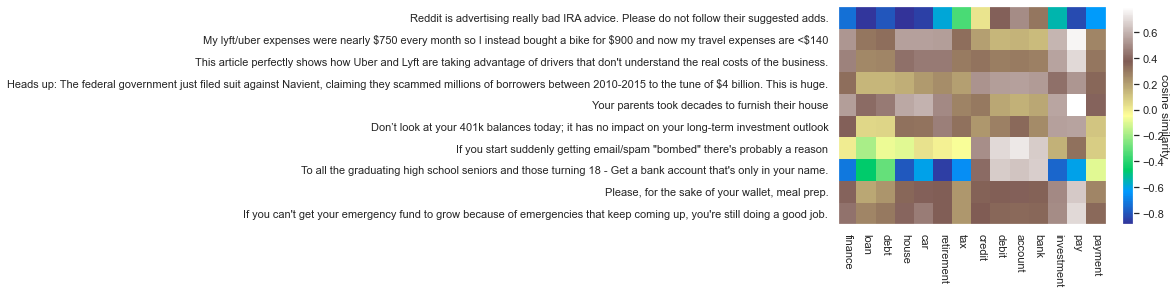

In [436]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

We have some positive as well as negative correlations.

What does this pattern reveal about the documentary organization of your semantic space?

## Projections

### Generate meaningful semantic dimensions

In [437]:
#words to create dimensions
pfTargetWords = ['worry','concern']
#words we will be mapping
pfTargetWords += ["loan","debt","house","car", "retirement",'tax', 'credit','debit','account','bank','investment']

wordsSubMatrix = []
for word in pfTargetWords:
    wordsSubMatrix.append(pf_W2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[-0.15209101,  0.12648904,  0.11584508, ...,  0.18038842,
        -0.15549439, -0.02831979],
       [-0.15800193,  0.11950333,  0.12047989, ...,  0.18706481,
        -0.15712877, -0.02747619],
       [-0.28322256,  0.3462938 ,  0.11767847, ..., -0.07087355,
         0.03059201,  0.04153433],
       ...,
       [-0.2480407 ,  0.33244112,  0.02550101, ...,  0.00408219,
        -0.09806353,  0.2413884 ],
       [-0.2113154 ,  0.2698195 ,  0.05736827, ...,  0.0616542 ,
        -0.1644256 ,  0.20711473],
       [-0.17317607,  0.14046435,  0.11455395, ...,  0.18700662,
        -0.13921706, -0.0129763 ]], dtype=float32)

In [438]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [454]:
# create 2 dimensions
family = dimension(pf_W2V, ['mom','parent','father','dad','mother'],['son','daughter','child'])
financial_status = dimension(pf_W2V,['loan','debt','poor','unemployment'],['saving','investment','rich','job'])

### Project another set of word vectors onto those dimensions

In [455]:
# prepare some words to project
tax = ['tax','income','salary','earn']
retirement = ['retirement','401k','ira','young','money']

In [456]:
# Define a function to project words
# in a word list to each of the three dimensions.
def makeDF(model, word_list):
    fml = [] #family
    fs = [] #financial status
    for word in word_list:
        fml.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), family.reshape(1,-1))[0][0])
        fs.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), financial_status.reshape(1,-1))[0][0])
    df = pandas.DataFrame({'family': fml, 'financial status': fs}, index = word_list)
    return df

In [457]:
# Get the projections
tax_df = makeDF(pf_W2V, tax)
retirement_df = makeDF(pf_W2V, retirement)

In [458]:
# Define some useful functions for plotting.
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

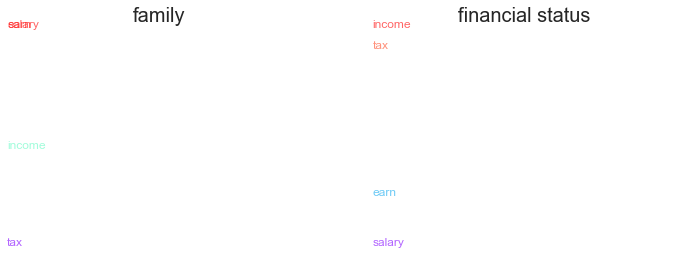

In [459]:
#tax
#Plot the occupational words in each of the two dimensions
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(121)
PlotDimension(ax1, tax_df, 'family')
ax2 = fig.add_subplot(122)
PlotDimension(ax2, tax_df, 'financial status')
plt.show()

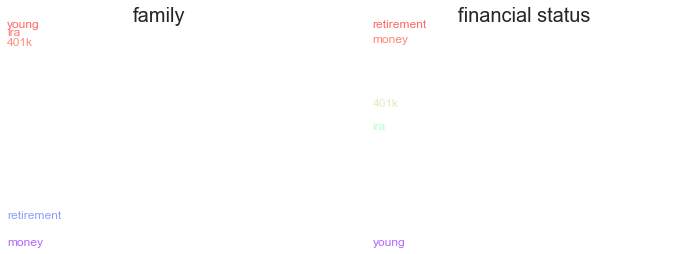

In [460]:
# retirement
#Plot the occupational words in each of the two dimensions
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(121)
PlotDimension(ax1, retirement_df, 'family')
ax2 = fig.add_subplot(122)
PlotDimension(ax2, retirement_df, 'financial status')
plt.show()

### Interpret the meaning of these projections for your analysis.

Which of the dimensions you analyze explain the most variation in the projection of your words and why?

Family dimension explains the most variation in the 'retirement' word list, because the concept of family is more related to retirement (for example, we may care our parents' retirement.) Fanancial status explain the most variation in 'tax' dimension, maybe because tax is more related to finance compared to family.
